In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist 
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)

In [2]:
! pip install yellowbrick

In [3]:
from yellowbrick.cluster import KElbowVisualizer

In [4]:
# Colorer les différentes cells du notebook

from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display

#@register_cell_magic
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

In [5]:
df9=pd.read_csv("exploration.csv", index_col=0)


In [6]:
df9.head(10)

customer_unique_id                          order_id  \
0  861eff4711a542e4b93843c6dd7febb0  00e7ee1b050b8499577073aeb2a297a1   
1  9eae34bbd3a474ec5d07949ca7de67c0  c1d2b34febe9cd269e378117d6681172   
2  9eae34bbd3a474ec5d07949ca7de67c0  c1d2b34febe9cd269e378117d6681172   
3  3c799d181c34d51f6d44bbbc563024db  b1a5d5365d330d10485e0203d54ab9e8   
4  23397e992b09769faf5e66f9e171a241  2e604b3614664aa66867856dba7e61b7   
5  567ab47ca4deb92d46dbf54dce07d0a7  574fe1739f65af76badd0999db300b4f   
6  f40ab89b622248b7ca125af4b486b887  e0b26f14d2bcc710bb02f77a4628763b   
7  749943913a9851a39c9baf51877fbab6  eaae5bd20fb15d85aa673d9b7c0e8ca5   
8  432ecfa8b7b7ad2663c7abed0dc83c51  c4e2bd2043fbd75b325a47adfabf0d77   
9  31318a0597cd9d50ce4cfd03c80fe780  1c7fe02ac4c7be50c59afb295cf85b89   

  order_purchase_timestamp  order_item_id product_category_name  \
0      2017-05-16 15:05:35              1     moveis_escritorio   
1      2017-11-09 00:50:13              1     moveis_escritorio   
2      2017-11-09 00:50:13              2     moveis_escritorio   
3      2017-05-07 20:11:26              1     moveis_escritorio   
4      2018-02-03 19:45:40              1     moveis_escritorio   
5      2017-03-23 15:10:17              1     moveis_escritorio   
6      2017-05-16 10:00:49              1     moveis_escritorio   
7      2017-03-18 23:04:36              1     moveis_escritorio   
8      2018-03-15 07:45:10              1     moveis_escritorio   
9      2018-01-26 13:22:09              1     moveis_escritorio   

  product_category  delivery_duration  total_cost  books_cds_media  \
0           others                9.0      146.87              0.0   
1           others               19.0      137.89              0.0   
2           others               19.0      137.89              0.0   
3           others               19.0      140.61              0.0   
4           others               25.0      137.58              0.0   
5           others               19.0      142.05              0.0   
6           others               13.0      155.70              0.0   
7           others               72.0      148.33              0.0   
8           others               21.0      150.07              0.0   
9           others               25.0      128.75              0.0   

   fashion_clothing  gifts_flowers  health_beauty  others  sports_outdoor  \
0               0.0            0.0            0.0     1.0             0.0   
1               0.0            0.0            0.0     1.0             0.0   
2               0.0            0.0            0.0     1.0             0.0   
3               0.0            0.0            0.0     1.0             0.0   
4               0.0            0.0            0.0     1.0             0.0   
5               0.0            0.0            0.0     1.0             0.0   
6               0.0            0.0            0.0     1.0             0.0   
7               0.0            0.0            0.0     1.0             0.0   
8               0.0            0.0            0.0     1.0             0.0   
9               0.0            0.0            0.0     1.0             0.0   

   technology  mean_score  total_orders  Recency  Frequency  Monetary  
0         0.0         4.0             1    111.0        1.0    141.90  
1         0.0         1.0             2    114.0        1.0     27.19  
2         0.0         1.0             2    537.0        1.0     86.22  
3         0.0         3.0             1    321.0        1.0     43.62  
4         0.0         4.0             1    288.0        1.0    196.89  
5         0.0         4.0             1    146.0        1.0    166.98  
6         0.0         4.0             1    131.0        1.0     35.38  
7         0.0         2.0             1    182.0        1.0    209.59  
8         0.0         3.0             1    543.0        1.0    150.12  
9         0.0         2.0             2    170.0        1.0    129.76

In [7]:
df9.shape

(91521, 20)

In [8]:
df9.isna().sum()

customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
order_item_id               0
product_category_name       0
product_category            0
delivery_duration           0
total_cost                  0
books_cds_media             0
fashion_clothing            0
gifts_flowers               0
health_beauty               0
others                      0
sports_outdoor              0
technology                  0
mean_score                  0
total_orders                0
Recency                     0
Frequency                   0
Monetary                    0
dtype: int64

In [9]:
df9.dtypes

customer_unique_id           object
order_id                     object
order_purchase_timestamp     object
order_item_id                 int64
product_category_name        object
product_category             object
delivery_duration           float64
total_cost                  float64
books_cds_media             float64
fashion_clothing            float64
gifts_flowers               float64
health_beauty               float64
others                      float64
sports_outdoor              float64
technology                  float64
mean_score                  float64
total_orders                  int64
Recency                     float64
Frequency                   float64
Monetary                    float64
dtype: object

In [10]:
df9.isnull().sum()

customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
order_item_id               0
product_category_name       0
product_category            0
delivery_duration           0
total_cost                  0
books_cds_media             0
fashion_clothing            0
gifts_flowers               0
health_beauty               0
others                      0
sports_outdoor              0
technology                  0
mean_score                  0
total_orders                0
Recency                     0
Frequency                   0
Monetary                    0
dtype: int64

<b> KMeans Clustering <b>

In [11]:
# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.pipeline import Pipeline, make_pipeline

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

In [13]:
ss = StandardScaler()

<b> Features Scaling <b>

In [14]:

# Selecting the numerical features
#numeric_features = list(df9.select_dtypes(include=['int64','float64', 'uint8']).columns)
num_features = df9[['Recency','Frequency','Monetary','mean_score','total_orders','delivery_duration']]

num_features.head()


Recency  Frequency  Monetary  mean_score  total_orders  delivery_duration
0    111.0        1.0    141.90         4.0             1                9.0
1    114.0        1.0     27.19         1.0             2               19.0
2    537.0        1.0     86.22         1.0             2               19.0
3    321.0        1.0     43.62         3.0             1               19.0
4    288.0        1.0    196.89         4.0             1               25.0

In [15]:
df9_scaled=ss.fit_transform(num_features)

In [16]:
X = df9[['Recency','Frequency','Monetary']]

#X = df9_scaled['Recency','Frequency','Monetary']

In [17]:
X.head()

Recency  Frequency  Monetary
0    111.0        1.0    141.90
1    114.0        1.0     27.19
2    537.0        1.0     86.22
3    321.0        1.0     43.62
4    288.0        1.0    196.89

In [18]:
# Scaling the numerical variables

rfm_scaled = ss.fit_transform(X)



In [19]:
rfm_scaled = pd.DataFrame(rfm_scaled, index=X.index, columns= X.columns)
rfm_scaled.head()


Recency  Frequency  Monetary
0 -0.827220  -0.159055 -0.019438
1 -0.807559  -0.159055 -0.604736
2  1.964697  -0.159055 -0.303541
3  0.549077  -0.159055 -0.520903
4  0.332802  -0.159055  0.261143

<b> KMeans Algorithm <b>

- Inertia is the sum of squared distances of samples to their closest cluster centre
-Distortion is the average of the euclidean squared distance from the centroid of the respective clusters.

Silhouette Score: 0.387


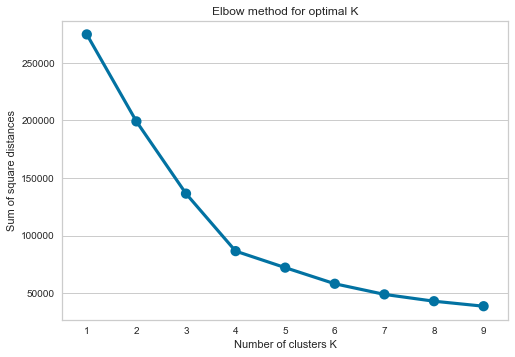

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Elbow method

# wcss means "within cluster sum of squares"

wcss={}

for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(rfm_scaled)
    wcss[k] = km.inertia_
    

# Calculate Silhoutte Score
score = silhouette_score(rfm_scaled, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)  #   Print the score
      
# Graph for the wcss values and the number of clusters

sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of square distances')
plt.title('Elbow method for optimal K')
plt.show()



<b> Analysis of clusters <b>

In [21]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.datasets import make_blobs



In [22]:
# Building clustering model with KMeans,  K=4 for  dataset rfm_scaled

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)

import time
time_start = time.time()

# Fit and predict the KMeans model

y_kmeans = kmeans.fit_predict(rfm_scaled)             ### y_kmeans = number of Clusters
#
print('K-Means done! Time elapsed: {} seconds'.format(time.time()-time_start))



K-Means done! Time elapsed: 0.3876638412475586 seconds


In [23]:
score = silhouette_score(rfm_scaled, kmeans.labels_, metric='euclidean')
#
kmeans_labels = kmeans.labels_

# Print the score
#
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.489


In [24]:
print(kmeans_labels)

[0 0 1 ... 1 0 1]


In [25]:
#Finding the clusters for the records given in our dataset

rfm_scaled['Cluster'] = kmeans.labels_

#The dataset
rfm_scaled.head()



Recency  Frequency  Monetary  Cluster
0 -0.827220  -0.159055 -0.019438        0
1 -0.807559  -0.159055 -0.604736        0
2  1.964697  -0.159055 -0.303541        1
3  0.549077  -0.159055 -0.520903        1
4  0.332802  -0.159055  0.261143        1

In [26]:
rfm_scaled

Recency  Frequency  Monetary  Cluster
0     -0.827220  -0.159055 -0.019438        0
1     -0.807559  -0.159055 -0.604736        0
2      1.964697  -0.159055 -0.303541        1
3      0.549077  -0.159055 -0.520903        1
4      0.332802  -0.159055  0.261143        1
...         ...        ...       ...      ...
92748  0.050988  -0.159055  0.110265        0
92750  0.162403  -0.159055 -0.311909        1
92751  2.167864  -0.159055 -0.169653        1
92752 -0.774790  -0.159055 -0.061329        0
92753  1.617346  -0.159055 -0.378342        1

[91521 rows x 4 columns]

In [27]:
from numpy import unique
from numpy import where

#clusters
y_kmeans


array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [28]:
len(y_kmeans)

91521

In [29]:
# retrieve unique clusters
clusters = unique(y_kmeans)
clusters

array([0, 1, 2, 3], dtype=int32)

In [30]:
X

Recency  Frequency  Monetary
0        111.0        1.0    141.90
1        114.0        1.0     27.19
2        537.0        1.0     86.22
3        321.0        1.0     43.62
4        288.0        1.0    196.89
...        ...        ...       ...
92748    245.0        1.0    167.32
92750    262.0        1.0     84.58
92751    568.0        1.0    112.46
92752    119.0        1.0    133.69
92753    484.0        1.0     71.56

[91521 rows x 3 columns]

In [31]:
#clusters
cluster0 = X[y_kmeans == 0]
cluster1 = X[y_kmeans == 1]
cluster2 = X[y_kmeans == 2]
cluster3 = X[y_kmeans == 3]

In [32]:
cluster0 

Recency  Frequency  Monetary
0        111.0        1.0    141.90
1        114.0        1.0     27.19
5        146.0        1.0    166.98
6        131.0        1.0     35.38
7        182.0        1.0    209.59
...        ...        ...       ...
92744    245.0        1.0    132.90
92745     14.0        1.0     63.42
92747    255.0        1.0     73.16
92748    245.0        1.0    167.32
92752    119.0        1.0    133.69

[49735 rows x 3 columns]

In [33]:
rfm_scaled[rfm_scaled['Cluster']==0]

Recency  Frequency  Monetary  Cluster
0     -0.827220  -0.159055 -0.019438        0
1     -0.807559  -0.159055 -0.604736        0
5     -0.597838  -0.159055  0.108530        0
6     -0.696144  -0.159055 -0.562947        0
7     -0.361901  -0.159055  0.325944        0
...         ...        ...       ...      ...
92744  0.050988  -0.159055 -0.065360        0
92745 -1.462939  -0.159055 -0.419876        0
92747  0.116526  -0.159055 -0.370178        0
92748  0.050988  -0.159055  0.110265        0
92752 -0.774790  -0.159055 -0.061329        0

[49735 rows x 4 columns]

In [34]:
#cluster1

In [35]:
cluster1.shape

(36578, 3)

In [36]:
cluster2.shape

(2487, 3)

In [37]:
cluster3.shape

(2721, 3)

In [38]:
for i in range(len(kmeans.cluster_centers_)):
    print("Cluster", i)
    print("Center:", kmeans.cluster_centers_[i])
    print("Size:", sum(kmeans.labels_ == i))

Cluster 0
Center: [-0.71775286 -0.15905474 -0.12249965]
Size: 49735
Cluster 1
Center: [ 0.98283468 -0.15905474 -0.13025599]
Size: 36578
Cluster 2
Center: [ 0.02256745 -0.14942356  4.49700706]
Size: 2487
Cluster 3
Center: [-0.11305893  5.18194743 -0.12528737]
Size: 2721


In [39]:
cluster0.describe()

Recency  Frequency      Monetary
count  49735.000000    49735.0  49735.000000
mean     127.704856        1.0    121.710404
std       72.361556        0.0     93.626466
min        0.000000        1.0      9.590000
25%       65.000000        1.0     56.930000
50%      129.000000        1.0     94.850000
75%      189.000000        1.0    157.300000
max      258.000000        1.0    604.730000

In [40]:
cluster1.describe()

Recency  Frequency      Monetary
count  36578.000000    36578.0  36578.000000
mean     387.182268        1.0    120.206667
std       95.940391        0.0     92.751923
min      258.000000        1.0      9.341429
25%      299.000000        1.0     56.750000
50%      374.000000        1.0     91.230000
75%      461.000000        1.0    153.017500
max      695.000000        1.0    671.310000

In [41]:
cluster2.describe()

Recency    Frequency     Monetary
count  2487.000000  2487.000000  2487.000000
mean    240.581021     1.002010  1027.601267
std     151.523039     0.044802   549.658225
min       1.000000     1.000000   564.890000
25%     115.000000     1.000000   683.760000
50%     225.000000     1.000000   839.400000
75%     349.500000     1.000000  1172.450000
max     694.000000     2.000000  6929.310000

In [42]:
cluster3.describe()

Recency    Frequency     Monetary
count  2721.000000  2721.000000  2721.000000
mean    219.969129     2.113561   121.155116
std     144.334422     0.507267    96.538446
min       1.000000     2.000000    14.976667
25%     104.000000     2.000000    64.098000
50%     198.000000     2.000000    94.577500
75%     317.000000     2.000000   146.365000
max     691.000000    15.000000  1034.340000

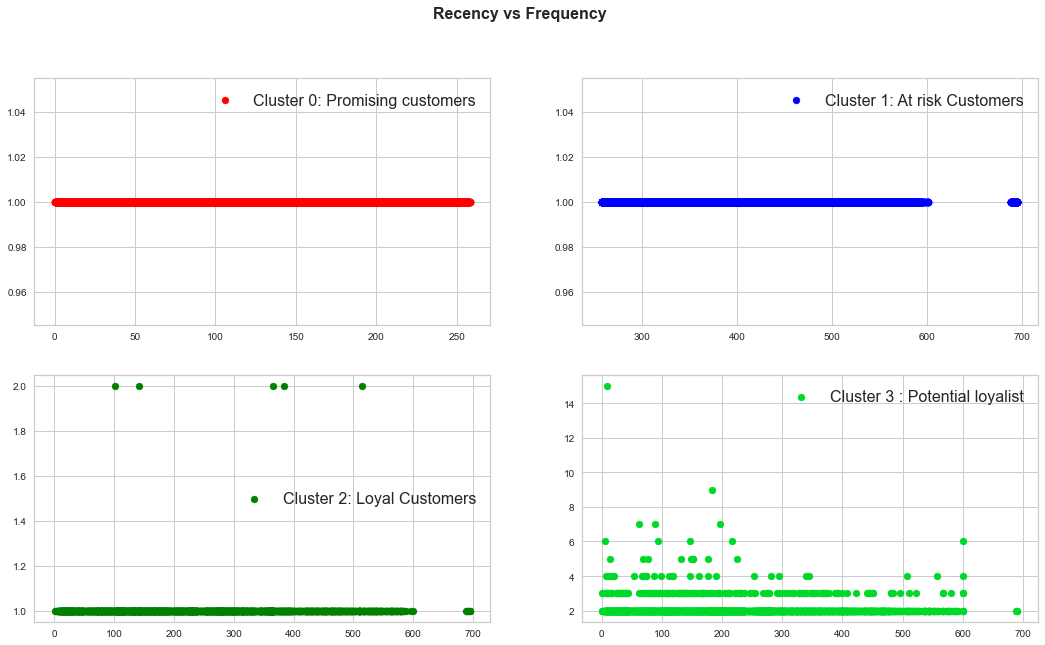

In [43]:
#Scatter plot for Kmeans

plt.figure(figsize=(18,10))
plt.suptitle('Recency vs Frequency', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(cluster0.iloc[:,0],cluster0.iloc[:,1],color = 'red',label = 'Cluster 0: Promising customers')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(cluster1.iloc[:,0],cluster1.iloc[:,1],color = 'blue',label = 'Cluster 1: At risk Customers')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(cluster2.iloc[:,0],cluster2.iloc[:,1],color = 'green',label = 'Cluster 2: Loyal Customers')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(cluster3.iloc[:,0],cluster3.iloc[:,1],color = "#00d927",label = 'Cluster 3 : Potential loyalist')
plt.legend(fontsize=16)
plt.show()


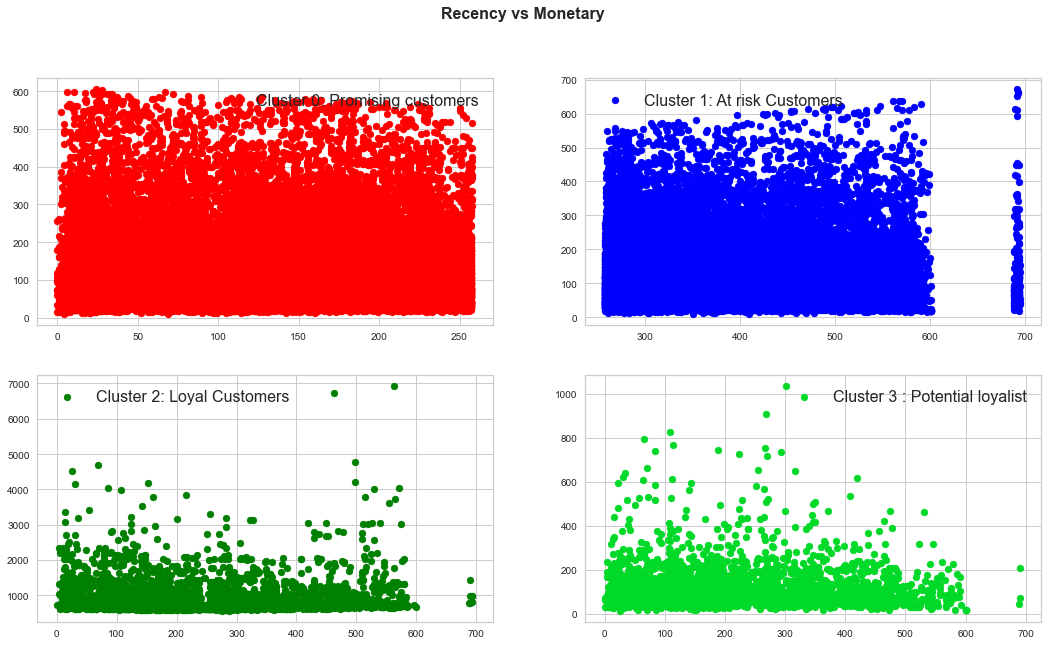

In [44]:
#Scatter plot for Kmeans

plt.figure(figsize=(18,10))
plt.suptitle('Recency vs Monetary', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(cluster0.iloc[:,0],cluster0.iloc[:,2],color = 'red',label = 'Cluster 0: Promising customers')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(cluster1.iloc[:,0],cluster1.iloc[:,2],color = 'blue',label = 'Cluster 1: At risk Customers')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(cluster2.iloc[:,0],cluster2.iloc[:,2],color = 'green',label = 'Cluster 2: Loyal Customers')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(cluster3.iloc[:,0],cluster3.iloc[:,2],color = "#00d927",label = 'Cluster 3 : Potential loyalist')
plt.legend(fontsize=16)
plt.show()


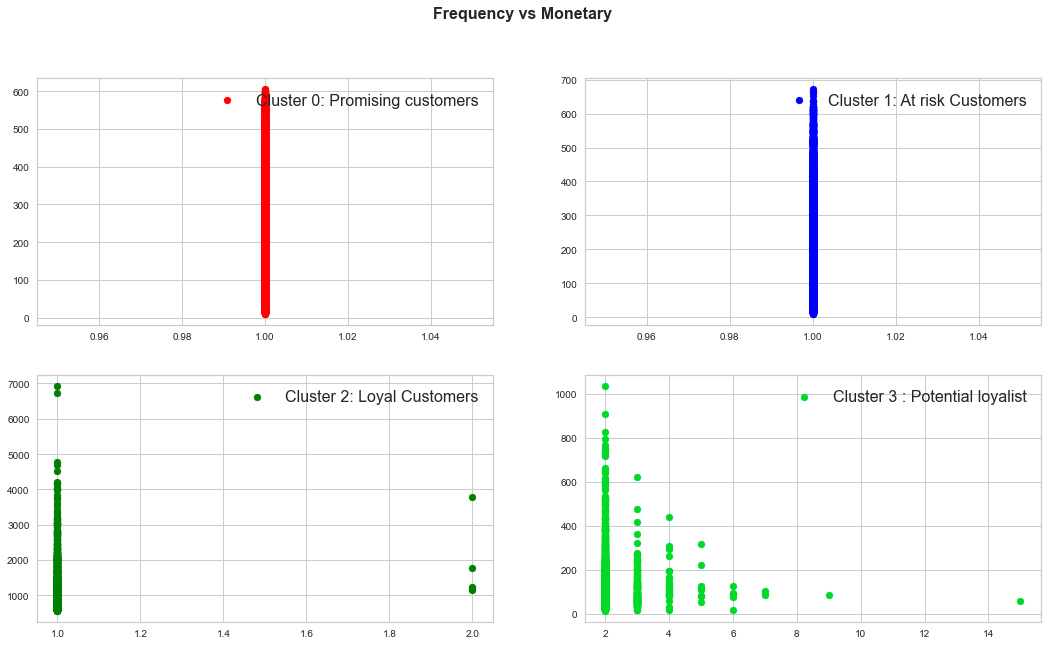

In [45]:
#Scatter plot for Kmeans

plt.figure(figsize=(18,10))
plt.suptitle('Frequency vs Monetary', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(cluster0.iloc[:,1],cluster0.iloc[:,2],color = 'red',label = 'Cluster 0: Promising customers')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(cluster1.iloc[:,1],cluster1.iloc[:,2],color = 'blue',label = 'Cluster 1: At risk Customers')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(cluster2.iloc[:,1],cluster2.iloc[:,2],color = 'green',label = 'Cluster 2: Loyal Customers')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(cluster3.iloc[:,1],cluster3.iloc[:,2],color = "#00d927",label = 'Cluster 3 : Potential loyalist')
plt.legend(fontsize=16)
plt.show()

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with 

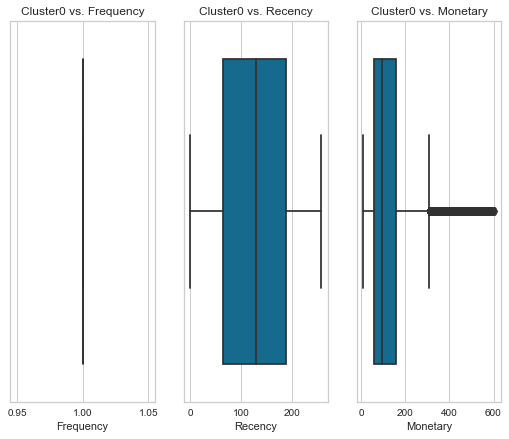

In [47]:
fig = plt.figure(1, figsize=(15, 7))

# Boxplot de la variable Frequence
plt.subplot(151)
sns.boxplot(cluster0["Frequency"], orient="vertical").set(title='Cluster0 vs. Frequency')

# Boxplot de la variable recence
plt.subplot(152)
sns.boxplot(cluster0["Recency"], orient="vertical").set(title='Cluster0 vs. Recency')

# Boxplot de la variable Monetary
plt.subplot(153)
sns.boxplot(cluster0["Monetary"], orient="vertical").set(title='Cluster0 vs. Monetary')

plt.show()

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with 

[Text(0.5, 1.0, 'Cluster3 vs. Recency')]

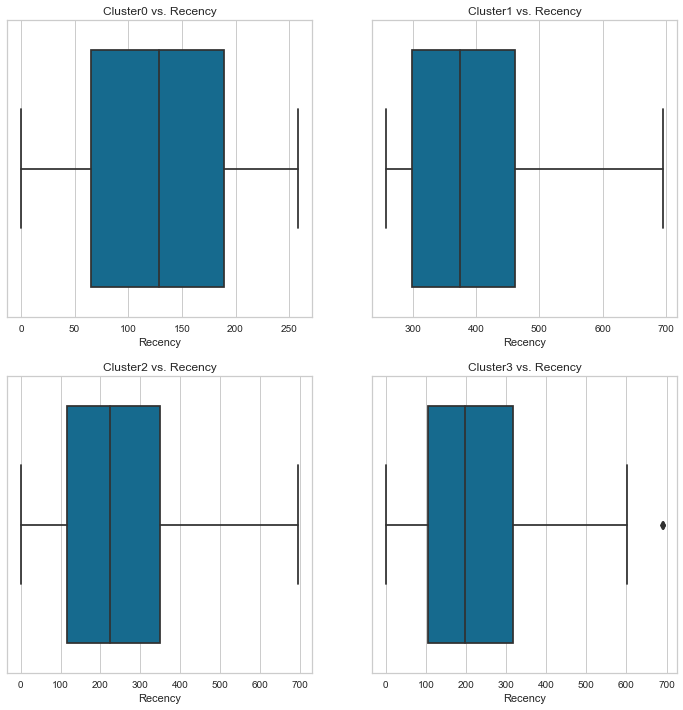

In [48]:
# Boxplot des clusters pour la feature Recency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Recency"], orient="vertical").set(title='Cluster0 vs. Recency')
plt.subplot(222)
sns.boxplot(cluster1["Recency"], orient="vertical").set(title='Cluster1 vs. Recency')
plt.subplot(223)
sns.boxplot(cluster2["Recency"], orient="vertical").set(title='Cluster2 vs. Recency')
plt.subplot(224)
sns.boxplot(cluster3["Recency"], orient="vertical").set(title='Cluster3 vs. Recency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with 

[Text(0.5, 1.0, 'Cluster3 vs. Frequency')]

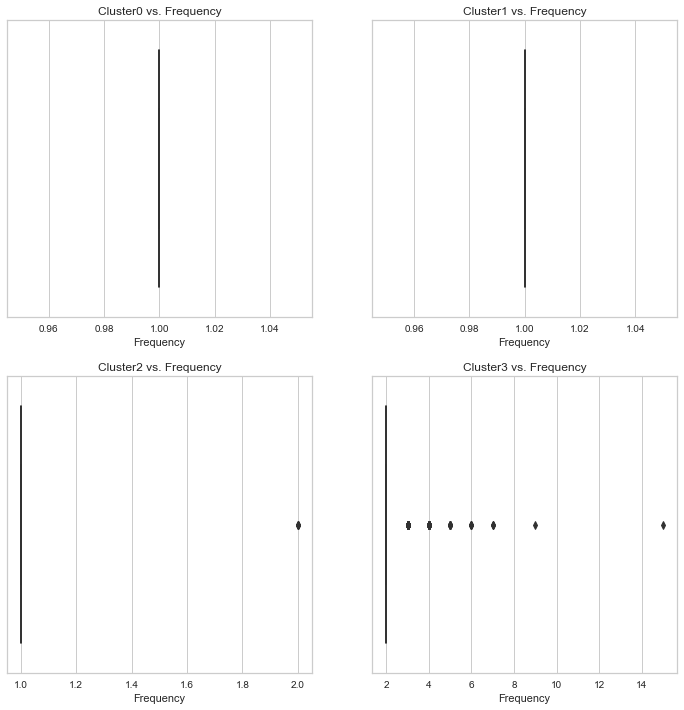

In [49]:
# Boxplot des clusters pour la feature Frequency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Frequency"], orient="vertical").set(title='Cluster0 vs. Frequency')
plt.subplot(222)
sns.boxplot(cluster1["Frequency"], orient="vertical").set(title='Cluster1 vs. Frequency')
plt.subplot(223)
sns.boxplot(cluster2["Frequency"], orient="vertical").set(title='Cluster2 vs. Frequency')
plt.subplot(224)
sns.boxplot(cluster3["Frequency"], orient="vertical").set(title='Cluster3 vs. Frequency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with 

[Text(0.5, 1.0, 'Cluster3 vs. Monetary')]

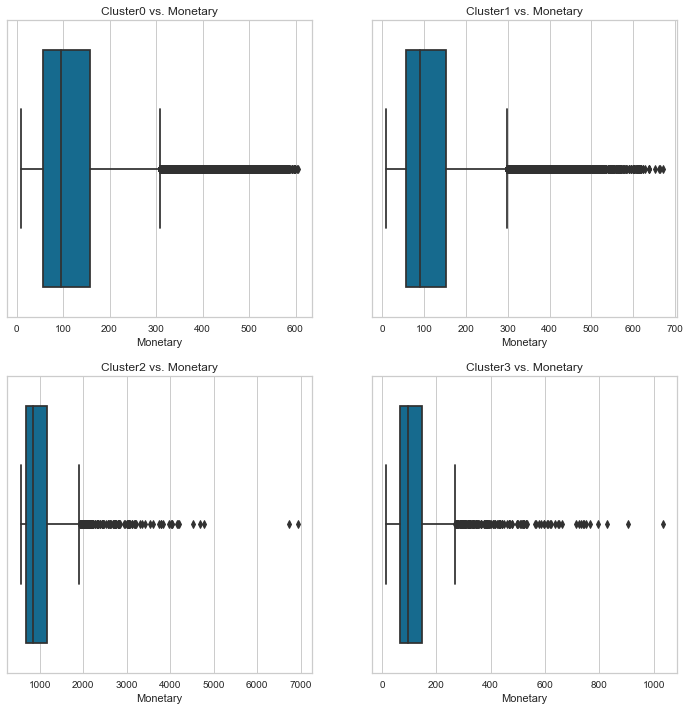

In [50]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["Monetary"], orient='vertical').set(title='Cluster0 vs. Monetary')
plt.subplot(222)
sns.boxplot(cluster1["Monetary"], orient='vertical').set(title='Cluster1 vs. Monetary')
plt.subplot(223)
sns.boxplot(cluster2["Monetary"], orient="vertical").set(title='Cluster2 vs. Monetary')
plt.subplot(224)
sns.boxplot(cluster3["Monetary"], orient="vertical").set(title='Cluster3 vs. Monetary')

In [51]:
kmeans_labels

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [52]:
type(kmeans_labels)

numpy.ndarray

In [53]:
X_scaled = pd.DataFrame(rfm_scaled, index=X.index, columns=X.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

Recency  Frequency  Monetary
kmeans_label                               
0            -0.717740  -0.159055 -0.122454
1             0.982822  -0.159055 -0.130127
2             0.022027  -0.149412  4.499773
3            -0.113059   5.181947 -0.125287

Silhouette Score: 0.49
Silhouette Score: 0.49


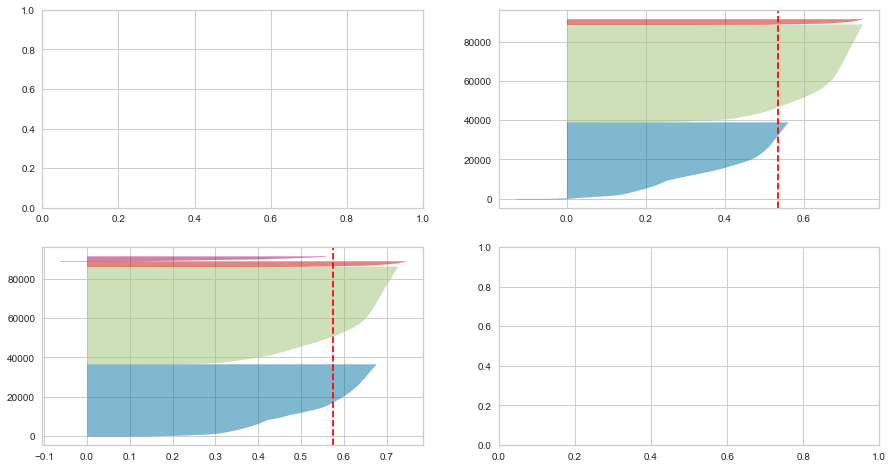

In [54]:

from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
#i=4
for i in [3,4]:
  
 #   Create KMeans instance for different number of clusters

    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # Print the score
     #
    #print('Silhouetter Score: %.3f' % score)
    print('Silhouette Score: %.2f' % score)


    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_scaled) 


/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


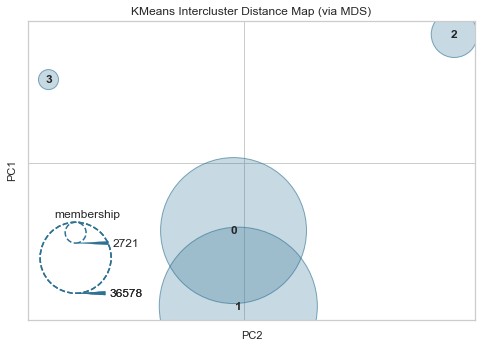

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [55]:
# Instantiate the clustering model and visualizer

visualizer = InterclusterDistance(kmeans)

visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



In [56]:
#X[X['Cluster']==0].describe()

In [57]:
#X[X['Cluster']==1].describe()

In [58]:
#X[X['Cluster']==2].describe()

In [59]:
#X[X['Cluster']==3].describe()

In [60]:
centroids=kmeans.cluster_centers_
centroids

array([[ 9.82821891e-01, -1.59054736e-01, -1.30126744e-01,
         1.00000000e+00],
       [-7.17740172e-01, -1.59054736e-01, -1.22454057e-01,
        -4.62963001e-14],
       [-1.13058934e-01,  5.18194743e+00, -1.25287367e-01,
         3.00000000e+00],
       [ 2.20272065e-02, -1.49411942e-01,  4.49977303e+00,
         2.00000000e+00]])

In [61]:
#Inertia 
inertia = kmeans.inertia_  
inertia

86504.36740767557

<b> Caratérisation des clusters : visualisation<b>

In [62]:
import plotly.graph_objects as go

In [63]:
def plot_radars(data, group):
    
    # We use a scaler to make the comparison possible because our data has different scales, 
    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    #starting the figure in plotly
    fig = go.Figure()
    
    #creating the areas inside the radar plot
    for k in data[group]:
        fig.add_trace(go.Scatterpolar(r=data[data[group]==k].iloc[:,1:].values.reshape(-1), # the values of each k group
            theta=data.columns[1:], #the name labels in the radar, from the columns names
           fill='toself',  #it fills the areas
            name='Cluster '+str(k) #naming each area with the cluster name 
                    ))
        
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 1])),showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [64]:
X_scaled_clusters

Recency  Frequency  Monetary
kmeans_label                               
0            -0.717740  -0.159055 -0.122454
1             0.982822  -0.159055 -0.130127
2             0.022027  -0.149412  4.499773
3            -0.113059   5.181947 -0.125287

In [65]:
# Transformation inverse de StandardScaler

X_clusters= ss.inverse_transform(X_scaled_clusters) 

In [66]:
type(X_clusters)

numpy.ndarray

In [67]:
X_clusters=pd.DataFrame(X_clusters)
X_clusters

0         1            2
0  127.704856  1.000000   121.710404
1  387.182268  1.000000   120.206667
2  240.581021  1.002010  1027.601267
3  219.969129  2.113561   121.155116

In [68]:
X["kmeans_label"] = kmeans_labels
X_clusters = X.groupby("kmeans_label").mean()
X_clusters

/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_2717/3652408607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["kmeans_label"] = kmeans_labels


Recency  Frequency     Monetary
kmeans_label                                    
0             127.704856   1.000000   121.710404
1             387.182268   1.000000   120.206667
2             240.581021   1.002010  1027.601267
3             219.969129   2.113561   121.155116

In [69]:
#plot_radars(data=X_scaled_clusters, group="kmeans_label")

In [70]:
plot_radars(data=X_clusters,group="kmeans_label")

In [71]:
df9.columns

Index(['customer_unique_id', 'order_id', 'order_purchase_timestamp',
       'order_item_id', 'product_category_name', 'product_category',
       'delivery_duration', 'total_cost', 'books_cds_media',
       'fashion_clothing', 'gifts_flowers', 'health_beauty', 'others',
       'sports_outdoor', 'technology', 'mean_score', 'total_orders', 'Recency',
       'Frequency', 'Monetary'],
      dtype='object')

In [72]:
X_scaled.shape

(91521, 4)

<b> Ajout d'autres features pour le clustering <b>

Dans la suite, nous effectuons le clustering en ajoutant d'autres features.

In [73]:
Xe=df9_scaled

In [74]:
Xe=pd.DataFrame(Xe,columns=num_features.columns)
Xe.head()

Recency  Frequency  Monetary  mean_score  total_orders  delivery_duration
0 -0.827220  -0.159055 -0.019438   -0.054859     -0.283959          -0.374954
1 -0.807559  -0.159055 -0.604736   -2.304502      0.053064           0.702957
2  1.964697  -0.159055 -0.303541   -2.304502      0.053064           0.702957
3  0.549077  -0.159055 -0.520903   -0.804740     -0.283959           0.702957
4  0.332802  -0.159055  0.261143   -0.054859     -0.283959           1.349704

In [75]:
Xe.min()

Recency             -1.554692
Frequency           -0.159055
Monetary            -0.695807
mean_score          -2.304502
total_orders        -0.283959
delivery_duration   -1.237283
dtype: float64

In [76]:
Xe.max()

Recency               3.000197
Frequency            66.989505
Monetary             34.612714
mean_score            0.695022
total_orders         24.655795
delivery_duration    21.075474
dtype: float64

In [77]:
Xe.isnull().sum()

Recency              0
Frequency            0
Monetary             0
mean_score           0
total_orders         0
delivery_duration    0
dtype: int64

In [78]:
Xe.dropna(axis=0, inplace=True)

Silhouetter Score: 0.258
        Recency  Frequency  Monetary  mean_score  total_orders  \
0     -0.827220  -0.159055 -0.019438   -0.054859     -0.283959   
1     -0.807559  -0.159055 -0.604736   -2.304502      0.053064   
2      1.964697  -0.159055 -0.303541   -2.304502      0.053064   
3      0.549077  -0.159055 -0.520903   -0.804740     -0.283959   
4      0.332802  -0.159055  0.261143   -0.054859     -0.283959   
...         ...        ...       ...         ...           ...   
91516  0.050988  -0.159055  0.110265    0.695022     -0.283959   
91517  0.162403  -0.159055 -0.311909    0.695022      0.727112   
91518  2.167864  -0.159055 -0.169653    0.695022      0.727112   
91519 -0.774790  -0.159055 -0.061329    0.695022      0.727112   
91520  1.617346  -0.159055 -0.378342    0.695022      0.727112   

       delivery_duration  
0              -0.374954  
1               0.702957  
2               0.702957  
3               0.702957  
4               1.349704  
...                 

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



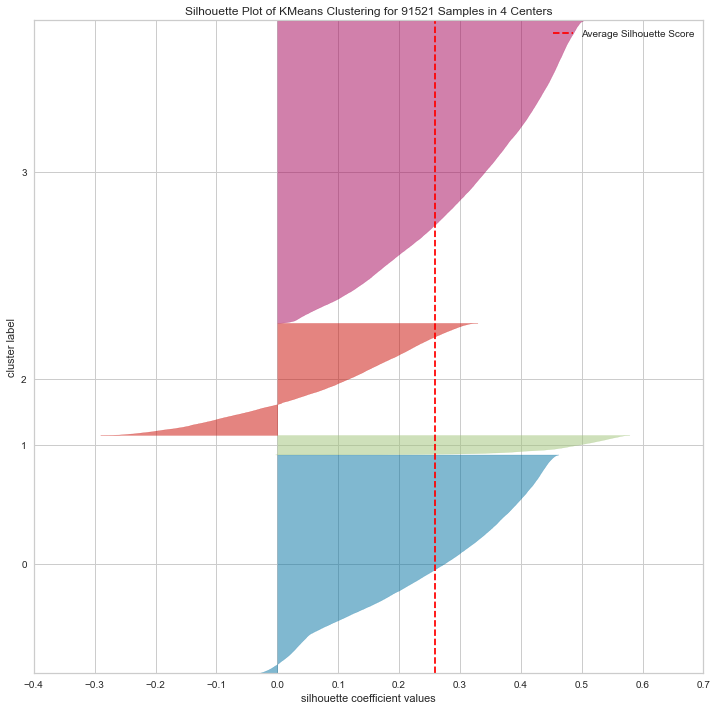

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91521 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
from yellowbrick.cluster import SilhouetteVisualizer

# Adding more features

    # Instantiate the KMeans models
km = KMeans(n_clusters=4, random_state=42)
#
    # Fit the KMeans model
#
km.fit_predict(Xe)
#
    # Calculate Silhoutte Score
score = silhouette_score(Xe, km.labels_, metric='euclidean')
#
    # Print the score
print('Silhouetter Score: %.3f' % score)
print(Xe)
    

plt.figure(figsize=(12,12))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(Xe) 
visualizer.show() 
  

In [80]:
Xe.head()

Recency  Frequency  Monetary  mean_score  total_orders  delivery_duration
0 -0.827220  -0.159055 -0.019438   -0.054859     -0.283959          -0.374954
1 -0.807559  -0.159055 -0.604736   -2.304502      0.053064           0.702957
2  1.964697  -0.159055 -0.303541   -2.304502      0.053064           0.702957
3  0.549077  -0.159055 -0.520903   -0.804740     -0.283959           0.702957
4  0.332802  -0.159055  0.261143   -0.054859     -0.283959           1.349704

In [81]:
Xe.isna().sum()

Recency              0
Frequency            0
Monetary             0
mean_score           0
total_orders         0
delivery_duration    0
dtype: int64

In [82]:
Xe.min()

Recency             -1.554692
Frequency           -0.159055
Monetary            -0.695807
mean_score          -2.304502
total_orders        -0.283959
delivery_duration   -1.237283
dtype: float64

In [83]:
Xe.max()

Recency               3.000197
Frequency            66.989505
Monetary             34.612714
mean_score            0.695022
total_orders         24.655795
delivery_duration    21.075474
dtype: float64

In [84]:
Xe.shape

(91521, 6)

In [85]:
Xe.dtypes

Recency              float64
Frequency            float64
Monetary             float64
mean_score           float64
total_orders         float64
delivery_duration    float64
dtype: object

In [86]:
kmeans=KMeans(n_clusters=4, init='k-means++', max_iter=1000 , random_state=20)

y_kmeans = kmeans.fit_predict(Xe) 
kmeans_labels= kmeans.labels_
score_kmeans = silhouette_score(Xe, kmeans.labels_, metric='euclidean')
print('silhouette score : %.3f' % score_kmeans)


silhouette score : 0.258


In [87]:
#clusters
cluster0 = Xe[y_kmeans == 0]
cluster1 = Xe[y_kmeans == 1]
cluster2 = Xe[y_kmeans == 2]
cluster3 = Xe[y_kmeans == 3]

In [88]:
cluster0

Recency  Frequency  Monetary  mean_score  total_orders  \
4      0.332802  -0.159055  0.261143   -0.054859     -0.283959   
8      2.004020  -0.159055  0.022503   -0.804740     -0.283959   
11     0.300033  -0.159055 -0.099240   -0.054859      1.401159   
14     0.955412  -0.159055 -0.277722   -0.054859      1.401159   
15     0.634276  -0.159055 -0.504423   -0.054859      1.401159   
...         ...        ...       ...         ...           ...   
91511  0.817782  -0.159055 -0.462838   -0.054859      0.053064   
91514  0.431108  -0.159055 -0.329155    0.695022     -0.283959   
91517  0.162403  -0.159055 -0.311909    0.695022      0.727112   
91518  2.167864  -0.159055 -0.169653    0.695022      0.727112   
91520  1.617346  -0.159055 -0.378342    0.695022      0.727112   

       delivery_duration  
4               1.349704  
8               0.918539  
11              0.810748  
14              0.810748  
15              0.810748  
...                  ...  
91511           0.164002  
91514           0.379584  
91517          -1.021700  
91518          -1.021700  
91520          -1.021700  

[30855 rows x 6 columns]

In [89]:
cluster0.describe()

Recency     Frequency      Monetary    mean_score  total_orders  \
count  30855.000000  3.085500e+04  30855.000000  30855.000000  30855.000000   
mean       1.009628 -1.590547e-01      0.006240      0.383205     -0.069741   
std        0.629827  6.031384e-14      1.047412      0.498661      0.558402   
min        0.109972 -1.590547e-01     -0.695807     -2.304502     -0.283959   
25%        0.437662 -1.590547e-01     -0.449597     -0.054859     -0.283959   
50%        0.929197 -1.590547e-01     -0.262058      0.695022     -0.283959   
75%        1.492823 -1.590547e-01      0.080339      0.695022      0.053064   
max        3.000197 -1.590547e-01     34.612714      0.695022      8.141633   

       delivery_duration  
count       30855.000000  
mean           -0.169859  
std             0.674881  
min            -1.237283  
25%            -0.698327  
50%            -0.267163  
75%             0.164002  
max             5.014601

In [90]:
#Xe =ss.inverse_transform(Xe)

In [91]:
cluster0=num_features[y_kmeans == 0]

In [92]:
cluster0

Recency  Frequency  Monetary  mean_score  total_orders  \
4        288.0        1.0    196.89         4.0             1   
8        543.0        1.0    150.12         3.0             1   
11       283.0        1.0    126.26         4.0             6   
14       383.0        1.0     91.28         4.0             6   
15       334.0        1.0     46.85         4.0             6   
...        ...        ...       ...         ...           ...   
92743    362.0        1.0     55.00         4.0             2   
92746    303.0        1.0     81.20         5.0             1   
92750    262.0        1.0     84.58         5.0             4   
92751    568.0        1.0    112.46         5.0             4   
92753    484.0        1.0     71.56         5.0             4   

       delivery_duration  
4                   25.0  
8                   21.0  
11                  20.0  
14                  20.0  
15                  20.0  
...                  ...  
92743               14.0  
92746               16.0  
92750                3.0  
92751                3.0  
92753                3.0  

[30855 rows x 6 columns]

In [93]:
cluster1=num_features[y_kmeans == 1]

In [94]:
cluster2=num_features[y_kmeans == 2]

In [95]:
cluster3=num_features[y_kmeans == 3]

In [96]:
num_features.head()

Recency  Frequency  Monetary  mean_score  total_orders  delivery_duration
0    111.0        1.0    141.90         4.0             1                9.0
1    114.0        1.0     27.19         1.0             2               19.0
2    537.0        1.0     86.22         1.0             2               19.0
3    321.0        1.0     43.62         3.0             1               19.0
4    288.0        1.0    196.89         4.0             1               25.0

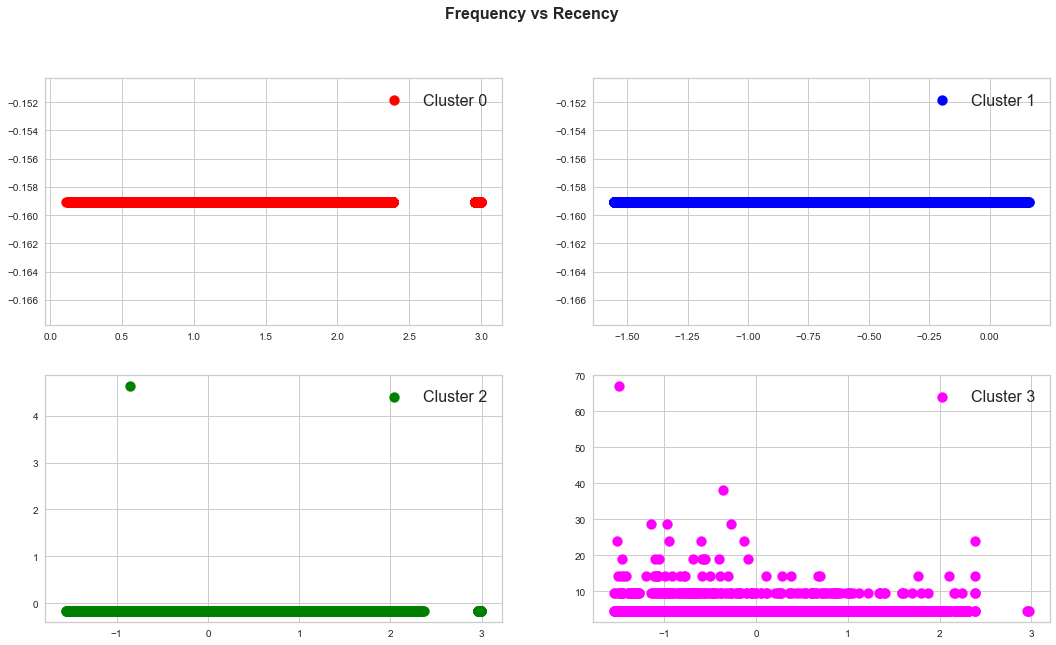

In [97]:
#Plot of clusters 
plt.figure(figsize=(18,10))
plt.suptitle('Frequency vs Recency', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(Xe.iloc[y_kmeans == 0, 0], Xe.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(Xe.iloc[y_kmeans == 1, 0], Xe.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(Xe.iloc[y_kmeans == 2, 0], Xe.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(Xe.iloc[y_kmeans == 3, 0], Xe.iloc[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

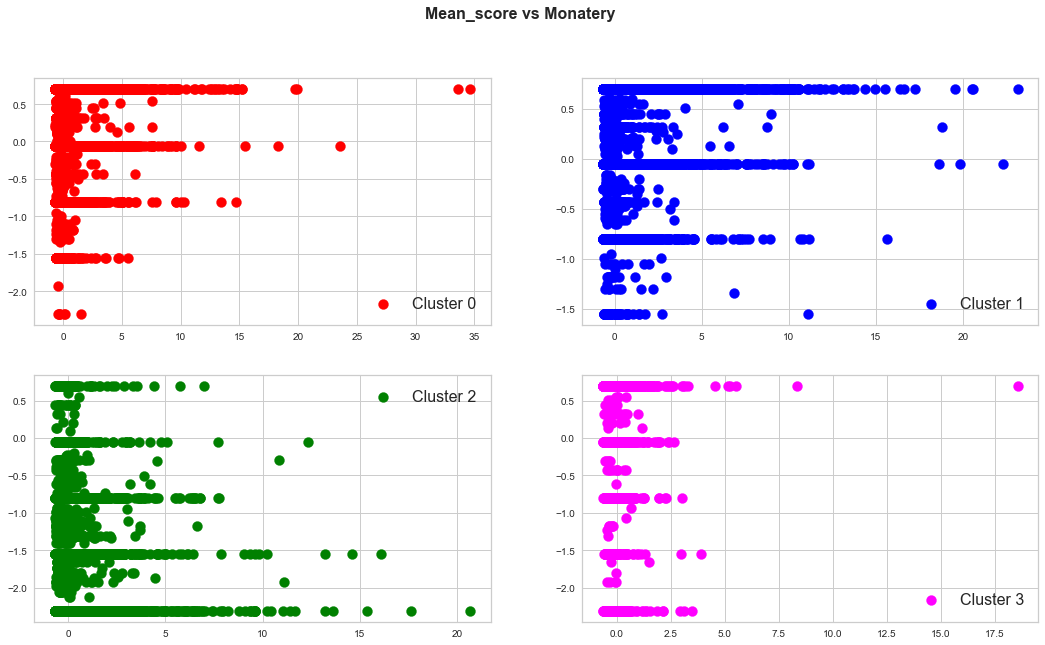

In [98]:
#Plot of clusters 
plt.figure(figsize=(18,10))
plt.suptitle('Mean_score vs Monatery', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(Xe.iloc[y_kmeans == 0, 2], Xe.iloc[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 0')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(Xe.iloc[y_kmeans == 1, 2], Xe.iloc[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 1')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(Xe.iloc[y_kmeans == 2, 2], Xe.iloc[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 2')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(Xe.iloc[y_kmeans == 3, 2], Xe.iloc[y_kmeans == 3, 3], s = 100, c = 'magenta', label = 'Cluster 3')
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [99]:
# Volume des clusters

for i in range(len(kmeans.cluster_centers_)):
    print("Cluster", i)
    print("Center:", kmeans.cluster_centers_[i])
    print("Size:", sum(kmeans.labels_ == i))

Cluster 0
Center: [ 1.00879652 -0.15905474  0.00595971  0.38329521 -0.06966818 -0.16990061]
Size: 30855
Cluster 1
Center: [-0.71856672 -0.15905474  0.00587263  0.40310677 -0.0771861  -0.19344839]
Size: 42222
Cluster 2
Center: [-0.03390197 -0.15874947 -0.00850677 -1.83859365  0.34407773  0.85896322]
Size: 15719
Cluster 3
Center: [-1.11805599e-01  5.18114791e+00 -1.09441059e-01  1.44029360e-02
  9.95834229e-04 -3.13277724e-02]
Size: 2725


/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Recency')]

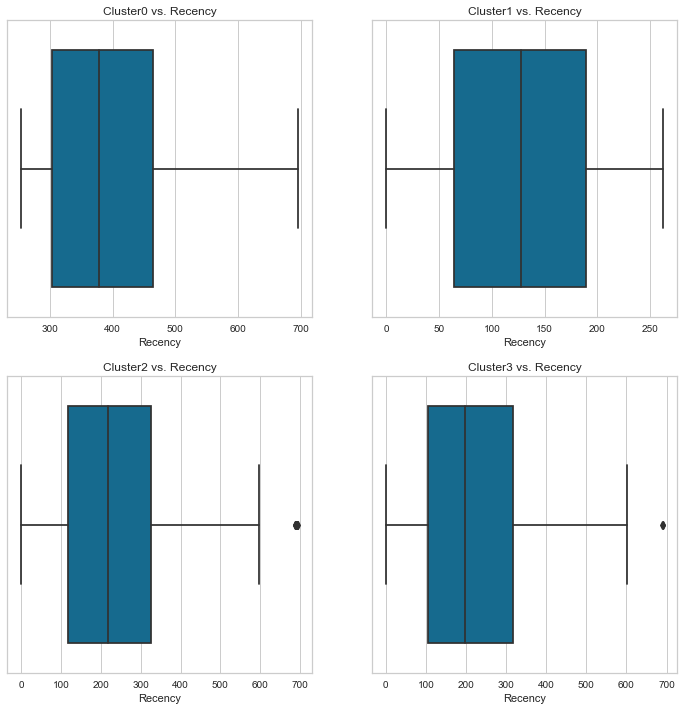

In [100]:
# Boxplot des clusters pour la feature Recency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Recency"], orient="vertical").set(title='Cluster0 vs. Recency')
plt.subplot(222)
sns.boxplot(cluster1["Recency"], orient="vertical").set(title='Cluster1 vs. Recency')
plt.subplot(223)
sns.boxplot(cluster2["Recency"], orient="vertical").set(title='Cluster2 vs. Recency')
plt.subplot(224)
sns.boxplot(cluster3["Recency"], orient="vertical").set(title='Cluster3 vs. Recency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Frequency')]

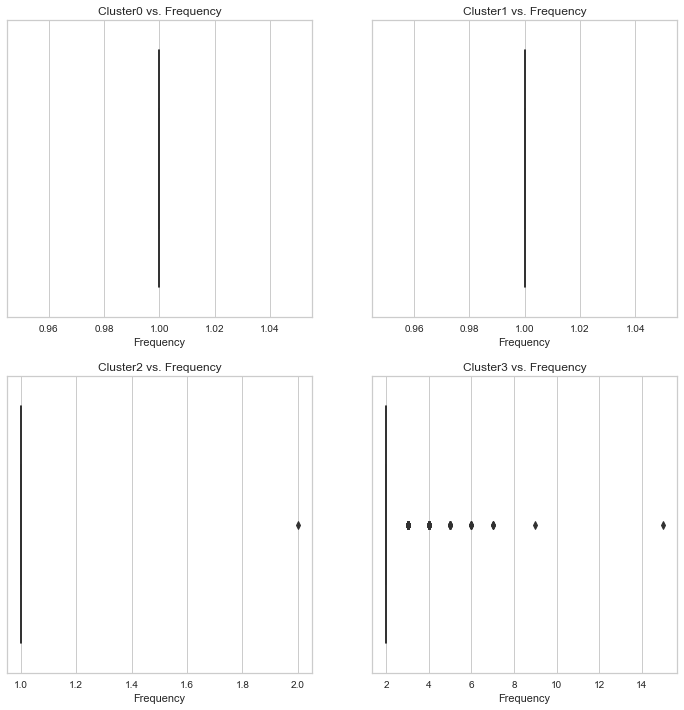

In [101]:
# Boxplot des clusters pour la feature Frequency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Frequency"], orient="vertical").set(title='Cluster0 vs. Frequency')
plt.subplot(222)
sns.boxplot(cluster1["Frequency"], orient="vertical").set(title='Cluster1 vs. Frequency')
plt.subplot(223)
sns.boxplot(cluster2["Frequency"], orient="vertical").set(title='Cluster2 vs. Frequency')
plt.subplot(224)
sns.boxplot(cluster3["Frequency"], orient="vertical").set(title='Cluster3 vs. Frequency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Monetary')]

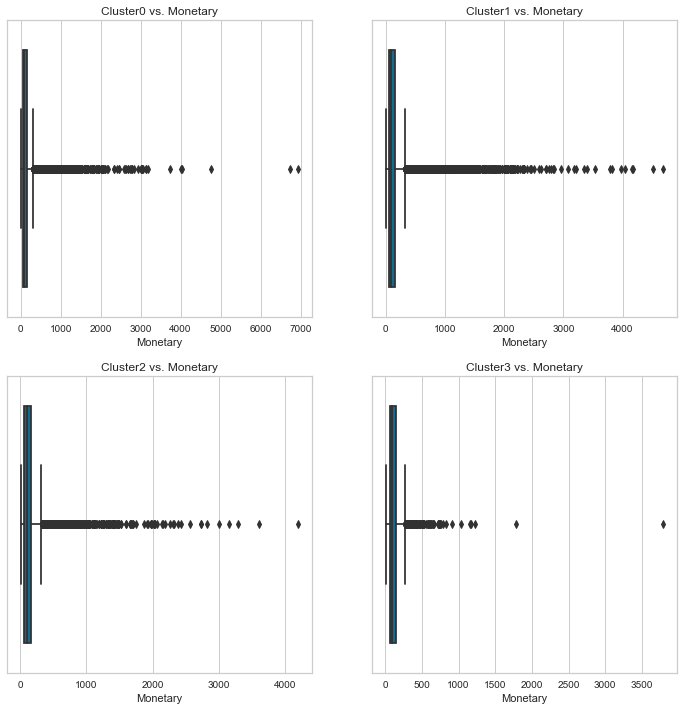

In [102]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["Monetary"], orient='vertical').set(title='Cluster0 vs. Monetary')
plt.subplot(222)
sns.boxplot(cluster1["Monetary"], orient='vertical').set(title='Cluster1 vs. Monetary')
plt.subplot(223)
sns.boxplot(cluster2["Monetary"], orient="vertical").set(title='Cluster2 vs. Monetary')
plt.subplot(224)
sns.boxplot(cluster3["Monetary"], orient="vertical").set(title='Cluster3 vs. Monetary')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. mean_score')]

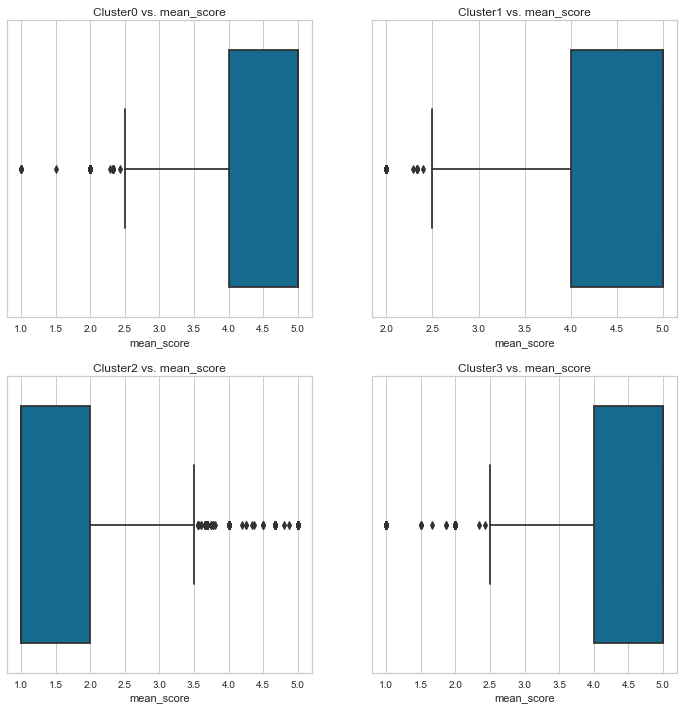

In [103]:
# Boxplot des clusters pour la feature Recency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["mean_score"], orient="vertical").set(title='Cluster0 vs. mean_score')
plt.subplot(222)
sns.boxplot(cluster1["mean_score"], orient="vertical").set(title='Cluster1 vs. mean_score')
plt.subplot(223)
sns.boxplot(cluster2["mean_score"], orient="vertical").set(title='Cluster2 vs. mean_score')
plt.subplot(224)
sns.boxplot(cluster3["mean_score"], orient="vertical").set(title='Cluster3 vs. mean_score')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. total_orders')]

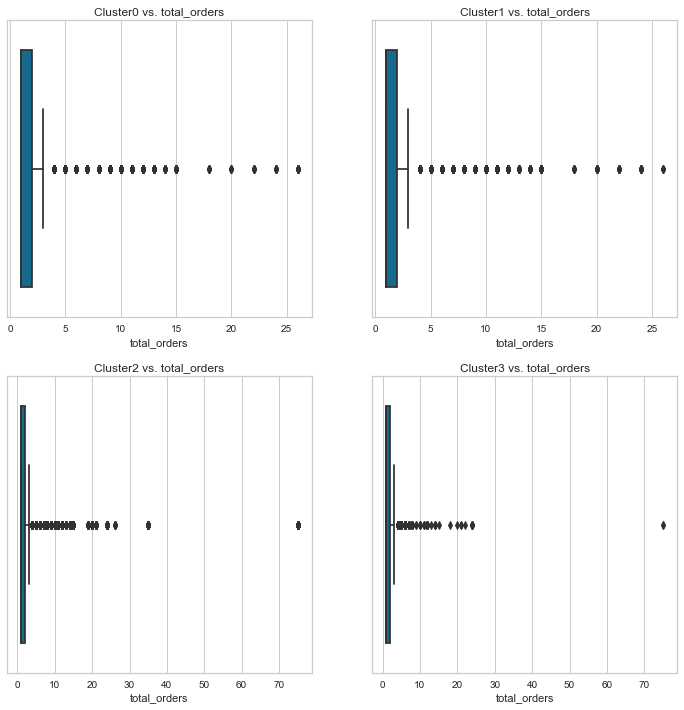

In [104]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["total_orders"], orient='vertical').set(title='Cluster0 vs. total_orders')
plt.subplot(222)
sns.boxplot(cluster1["total_orders"], orient='vertical').set(title='Cluster1 vs. total_orders')
plt.subplot(223)
sns.boxplot(cluster2["total_orders"], orient="vertical").set(title='Cluster2 vs. total_orders')
plt.subplot(224)
sns.boxplot(cluster3["total_orders"], orient="vertical").set(title='Cluster3 vs. total_orders')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. delivery_duration')]

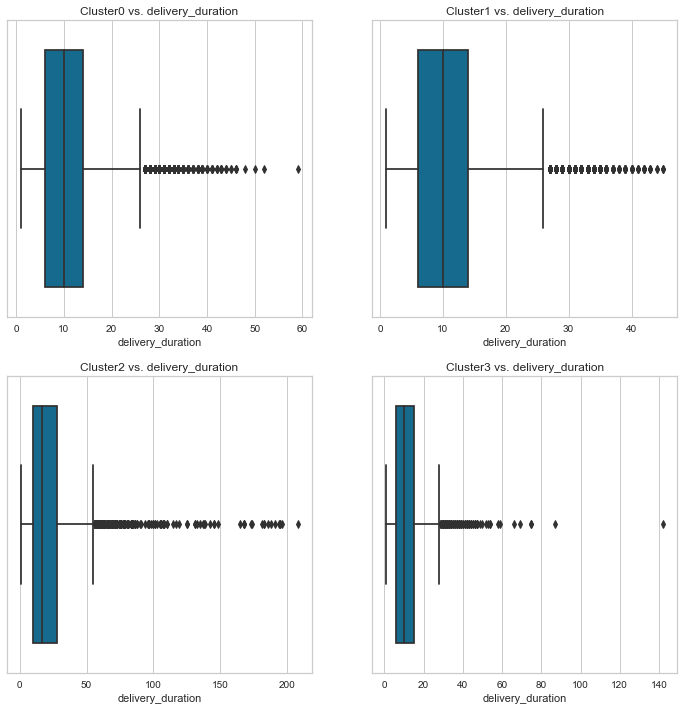

In [105]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["delivery_duration"], orient='vertical').set(title='Cluster0 vs. delivery_duration')
plt.subplot(222)
sns.boxplot(cluster1["delivery_duration"], orient='vertical').set(title='Cluster1 vs. delivery_duration')
plt.subplot(223)
sns.boxplot(cluster2["delivery_duration"], orient="vertical").set(title='Cluster2 vs. delivery_duration')
plt.subplot(224)
sns.boxplot(cluster3["delivery_duration"], orient="vertical").set(title='Cluster3 vs. delivery_duration')

In [106]:
#centers = ss.inverse_transform(kmeans.cluster_centers_)


In [109]:

# Display the clusters column in rfm_sclaed

Xe_scaled = pd.DataFrame(Xe, index=Xe.index, columns=Xe.columns)
Xe_scaled["kmeans_label"] = kmeans_labels
Xe_scaled_clusters = Xe_scaled.groupby("kmeans_label").mean()
Xe_scaled_clusters

Recency  Frequency  Monetary  mean_score  total_orders  \
kmeans_label                                                            
0             1.009628  -0.159055  0.006240    0.383205     -0.069741   
1            -0.717994  -0.159055  0.005723    0.403277     -0.077564   
2            -0.033860  -0.158750 -0.008649   -1.837915      0.345063   
3            -0.111806   5.181148 -0.109441    0.014403      0.000996   

              delivery_duration  
kmeans_label                     
0                     -0.169859  
1                     -0.193558  
2                      0.858757  
3                     -0.031328

In [110]:
Xe_scaled_clusters.shape

(4, 6)

In [112]:
Xe.shape

(91521, 7)

In [113]:
Xe_scaled.shape

(91521, 7)

In [114]:
kmeans.labels_.shape

(91521,)

In [115]:
type(Xe_scaled_clusters)

pandas.core.frame.DataFrame

In [116]:

#Xe_clusters=pd.DataFrame(Xe_scaled_clusters)
Xe_clusters=Xe_scaled_clusters
Xe_clusters


Recency  Frequency  Monetary  mean_score  total_orders  \
kmeans_label                                                            
0             1.009628  -0.159055  0.006240    0.383205     -0.069741   
1            -0.717994  -0.159055  0.005723    0.403277     -0.077564   
2            -0.033860  -0.158750 -0.008649   -1.837915      0.345063   
3            -0.111806   5.181148 -0.109441    0.014403      0.000996   

              delivery_duration  
kmeans_label                     
0                     -0.169859  
1                     -0.193558  
2                      0.858757  
3                     -0.031328

In [117]:
#Xe_clusters=ss.inverse_transform(Xe_scaled_clusters)
#Xe_clusters

In [118]:
plot_radars(data=Xe_clusters,group="kmeans_label")

In [119]:
cluster0.describe()

Recency  Frequency      Monetary    mean_score  total_orders  \
count  30855.000000    30855.0  30855.000000  30855.000000  30855.000000   
mean     391.272468        1.0    146.932641      4.584179      1.635618   
std       96.101063        0.0    205.277943      0.664987      1.656863   
min      254.000000        1.0      9.341429      1.000000      1.000000   
25%      304.000000        1.0     57.595000      4.000000      1.000000   
50%      379.000000        1.0     94.350000      5.000000      1.000000   
75%      465.000000        1.0    161.455000      5.000000      2.000000   
max      695.000000        1.0   6929.310000      5.000000     26.000000   

       delivery_duration  
count       30855.000000  
mean           10.902706  
std             6.261009  
min             1.000000  
25%             6.000000  
50%            10.000000  
75%            14.000000  
max            59.000000

In [120]:
cluster1.describe()

Recency  Frequency      Monetary    mean_score  total_orders  \
count  42222.000000    42222.0  42222.000000  42222.000000  42222.000000   
mean     127.666051        1.0    146.831299      4.610945      1.612406   
std       72.917033        0.0    196.121942      0.627048      1.553542   
min        0.000000        1.0      9.590000      2.000000      1.000000   
25%       64.000000        1.0     57.722500      4.000000      1.000000   
50%      128.000000        1.0     97.775000      5.000000      1.000000   
75%      189.000000        1.0    163.790000      5.000000      2.000000   
max      262.000000        1.0   4681.780000      5.000000     26.000000   

       delivery_duration  
count       42222.000000  
mean           10.682843  
std             6.068746  
min             1.000000  
25%             6.000000  
50%            10.000000  
75%            14.000000  
max            45.000000

In [121]:
cluster2.describe()

Recency     Frequency     Monetary    mean_score  total_orders  \
count  15719.000000  15719.000000  15719.00000  15719.000000  15719.000000   
mean     232.053566      1.000064    144.01460      1.622214      2.866404   
std      143.640170      0.007976    186.19911      0.912754      6.057301   
min        0.000000      1.000000     11.85000      1.000000      1.000000   
25%      119.000000      1.000000     57.38500      1.000000      1.000000   
50%      218.000000      1.000000     96.62000      1.000000      1.000000   
75%      326.000000      1.000000    162.95500      2.000000      2.000000   
max      694.000000      2.000000   4194.76000      5.000000     75.000000   

       delivery_duration  
count       15719.000000  
mean           20.445385  
std            15.318518  
min             1.000000  
25%            10.000000  
50%            17.000000  
75%            28.000000  
max           208.000000

In [122]:
cluster3.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  2725.000000  2725.000000  2725.000000  2725.000000   2725.000000   
mean    220.160367     2.113394   124.260767     4.092364      1.845505   
std     144.409165     0.506913   128.357769     1.316369      2.867994   
min       1.000000     2.000000    14.976667     1.000000      1.000000   
25%     104.000000     2.000000    64.110000     4.000000      1.000000   
50%     198.000000     2.000000    94.705000     5.000000      1.000000   
75%     318.000000     2.000000   146.480000     5.000000      2.000000   
max     691.000000    15.000000  3785.815000     5.000000     75.000000   

       delivery_duration  
count        2725.000000  
mean           12.187890  
std             8.850898  
min             1.000000  
25%             6.000000  
50%            10.000000  
75%            15.000000  
max           142.000000

<b> Agglomerative clustering <b>

In [123]:
#importing the required module
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [124]:
Xe.head()

Recency  Frequency  Monetary  mean_score  total_orders  delivery_duration  \
0 -0.827220  -0.159055 -0.019438   -0.054859     -0.283959          -0.374954   
1 -0.807559  -0.159055 -0.604736   -2.304502      0.053064           0.702957   
2  1.964697  -0.159055 -0.303541   -2.304502      0.053064           0.702957   
3  0.549077  -0.159055 -0.520903   -0.804740     -0.283959           0.702957   
4  0.332802  -0.159055  0.261143   -0.054859     -0.283959           1.349704   

   kmeans_label  
0             1  
1             2  
2             2  
3             2  
4             0

In [125]:
#
Xn= Xe[['Recency','Frequency','Monetary', 'mean_score','total_orders', 'delivery_duration']]
X1=Xn.sample(n=10000)
X1.head()

Recency  Frequency  Monetary  mean_score  total_orders  \
47959 -0.125964  -0.159055 -0.540650   -0.804740      0.053064   
79161 -0.715806  -0.159055 -0.208432    0.695022     -0.283959   
5658  -0.689591  -0.159055 -0.581775    0.695022     -0.283959   
46646 -0.571622  -0.159055 -0.354208    0.695022      0.053064   
10676 -1.377739  -0.159055  0.301758    0.695022      0.053064   

       delivery_duration  
47959           0.379584  
79161          -0.698327  
5658           -0.806118  
46646          -0.159372  
10676           0.056210

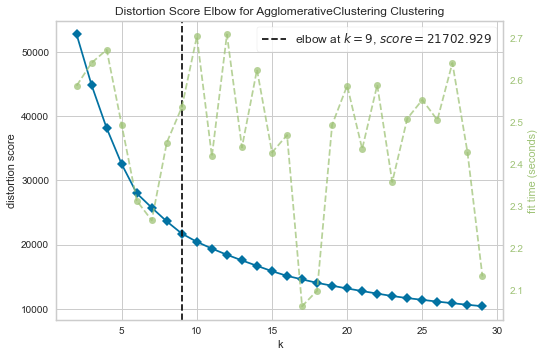

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
# define the model
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

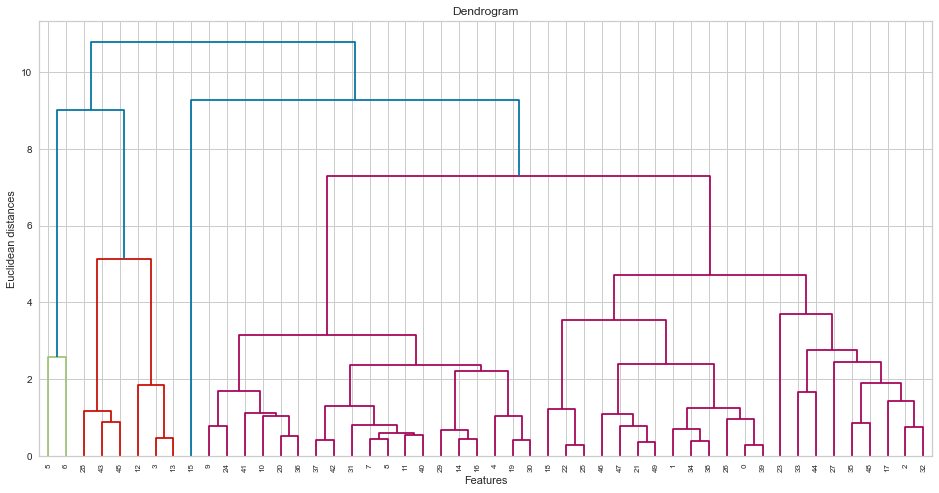

In [127]:
# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(Xn.sample(n=50, random_state=1), method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean distances')
plt.show()

In [128]:
# Number of CLUSTERS 

# define the model
AggCl = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
# fit model and predict clusters
y_AggCl = AggCl.fit_predict(X1)

#clusters
y_AggCl


array([0, 0, 0, ..., 0, 0, 0])

In [129]:
# retrieve unique clusters
clusters_ac = unique(y_AggCl)
clusters_ac

array([0, 1, 2, 3])

In [130]:
#Silhouette score for agglomerative clustering

score_AGclustering_s = silhouette_score(X1, AggCl.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score_AGclustering_s)

Silhouette Score: 0.359


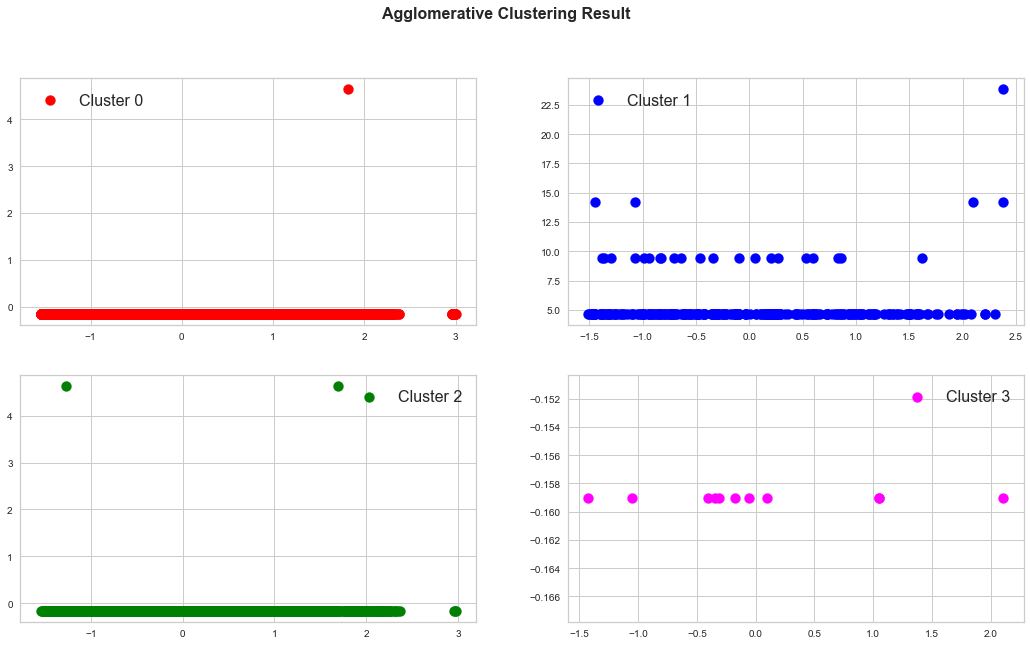

In [131]:
#Plot of clusters 
plt.figure(figsize=(18,10))
plt.suptitle('Agglomerative Clustering Result', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(X1.iloc[y_AggCl == 0, 0], X1.iloc[y_AggCl == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(X1.iloc[y_AggCl == 1, 0], X1.iloc[y_AggCl == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(X1.iloc[y_AggCl == 2, 0], X1.iloc[y_AggCl == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(X1.iloc[y_AggCl == 3, 0], X1.iloc[y_AggCl == 3, 1], s = 100, c = 'magenta',label = 'Cluster 3')
plt.legend(fontsize=16)
#plt.title('Agglomerative Clustering Result', fontweight='bold',fontsize=30)
plt.grid(True)
#plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

In [132]:

for i in range(len(clusters_ac)):
    print("Cluster", i)
    #print("Center:", AggCl.cluster_centers_[i])
    print("Size:", sum(AggCl.labels_ == i))


Cluster 0
Size: 8002
Cluster 1
Size: 289
Cluster 2
Size: 1698
Cluster 3
Size: 11


In [133]:
#clusters
cluster0 = X1[y_AggCl == 0]
cluster1 = X1[y_AggCl == 1]
cluster2 = X1[y_AggCl == 2]
cluster3 = X1[y_AggCl == 3]

In [134]:
cluster0.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  8002.000000  8002.000000  8002.000000  8002.000000   8002.000000   
mean      0.004850    -0.158455     0.054522     0.351617     -0.054630   
std       1.001313     0.053618     1.130746     0.577707      0.521564   
min      -1.548138    -0.159055    -0.675659    -2.304502     -0.283959   
25%      -0.807559    -0.159055    -0.440898    -0.054859     -0.283959   
50%      -0.119410    -0.159055    -0.241393     0.695022     -0.283959   
75%       0.719475    -0.159055     0.110112     0.695022      0.053064   
max       3.000197     4.637271    20.560420     0.695022      4.434373   

       delivery_duration  
count        8002.000000  
mean           -0.215328  
std             0.615544  
min            -1.237283  
25%            -0.698327  
50%            -0.374954  
75%             0.164002  
max             4.475645

In [135]:
cluster1.describe()

Recency   Frequency    Monetary  mean_score  total_orders  \
count  289.000000  289.000000  289.000000  289.000000    289.000000   
mean     0.012595    5.184948   -0.162246    0.038552     -0.137022   
std      0.988412    1.983058    0.442899    0.993981      0.369973   
min     -1.508815    4.637271   -0.649739   -2.304502     -0.283959   
25%     -0.801005    4.637271   -0.442173   -0.054859     -0.283959   
50%     -0.099749    4.637271   -0.283463    0.695022     -0.283959   
75%      0.771906    4.637271   -0.032177    0.695022     -0.283959   
max      2.384140   23.822574    2.901828    0.695022      3.423302   

       delivery_duration  
count         289.000000  
mean           -0.075078  
std             0.826869  
min            -1.237283  
25%            -0.698327  
50%            -0.267163  
75%             0.271793  
max             4.475645

In [136]:
X11=num_features.sample(n=10000)

In [137]:
cluster0=X11[y_AggCl == 0]
cluster1=X11[y_AggCl == 1]
cluster2=X11[y_AggCl == 2]
cluster3=X11[y_AggCl == 3]

In [138]:
cluster0.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  8002.000000  8002.000000  8002.000000  8002.000000   8002.000000   
mean    236.324669     1.034866   147.655786     4.089102      1.880280   
std     153.541331     0.262965   201.485073     1.322069      3.295612   
min       0.000000     1.000000    13.290000     1.000000      1.000000   
25%     114.000000     1.000000    57.500000     4.000000      1.000000   
50%     217.000000     1.000000    96.880000     5.000000      1.000000   
75%     345.000000     1.000000   163.235000     5.000000      2.000000   
max     695.000000    15.000000  4163.510000     5.000000     75.000000   

       delivery_duration  
count        8002.000000  
mean           12.522994  
std             9.699962  
min             1.000000  
25%             7.000000  
50%            10.000000  
75%            16.000000  
max           208.000000

In [139]:
cluster1.describe()

Recency   Frequency     Monetary  mean_score  total_orders  \
count  289.000000  289.000000   289.000000  289.000000    289.000000   
mean   233.595156    1.044983   153.915326    3.938293      1.702422   
std    150.390229    0.238741   204.764402    1.438871      2.070299   
min      4.000000    1.000000    21.620000    1.000000      1.000000   
25%    112.000000    1.000000    55.790000    3.000000      1.000000   
50%    220.000000    1.000000   102.260000    5.000000      1.000000   
75%    341.000000    1.000000   172.730000    5.000000      2.000000   
max    693.000000    3.000000  2110.570000    5.000000     24.000000   

       delivery_duration  
count         289.000000  
mean           12.539792  
std             8.158115  
min             1.000000  
25%             7.000000  
50%            11.000000  
75%            16.000000  
max            52.000000

In [140]:
cluster2.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  1698.000000  1698.000000  1698.000000  1698.000000   1698.000000   
mean    242.858068     1.028269   149.009350     4.094126      1.926384   
std     153.269400     0.172750   207.870508     1.331736      3.730127   
min       3.000000     1.000000    17.290000     1.000000      1.000000   
25%     118.000000     1.000000    58.797500     4.000000      1.000000   
50%     227.500000     1.000000    98.580000     5.000000      1.000000   
75%     352.750000     1.000000   160.622500     5.000000      2.000000   
max     691.000000     3.000000  3076.130000     5.000000     75.000000   

       delivery_duration  
count        1698.000000  
mean           12.678445  
std             9.043157  
min             1.000000  
25%             7.000000  
50%            11.000000  
75%            16.000000  
max            75.000000

In [141]:
cluster3.describe()

Recency  Frequency    Monetary  mean_score  total_orders  \
count   11.000000       11.0   11.000000   11.000000     11.000000   
mean   192.636364        1.0  119.734091    3.727273      1.363636   
std    117.436172        0.0  146.690042    1.489356      0.924416   
min     36.000000        1.0   36.380000    1.000000      1.000000   
25%    118.000000        1.0   50.565000    2.500000      1.000000   
50%    172.000000        1.0   69.970000    4.000000      1.000000   
75%    264.000000        1.0  103.065000    5.000000      1.000000   
max    416.000000        1.0  541.600000    5.000000      4.000000   

       delivery_duration  
count          11.000000  
mean           15.454545  
std            12.691443  
min             6.000000  
25%             9.000000  
50%            10.000000  
75%            15.000000  
max            47.000000

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Recency')]

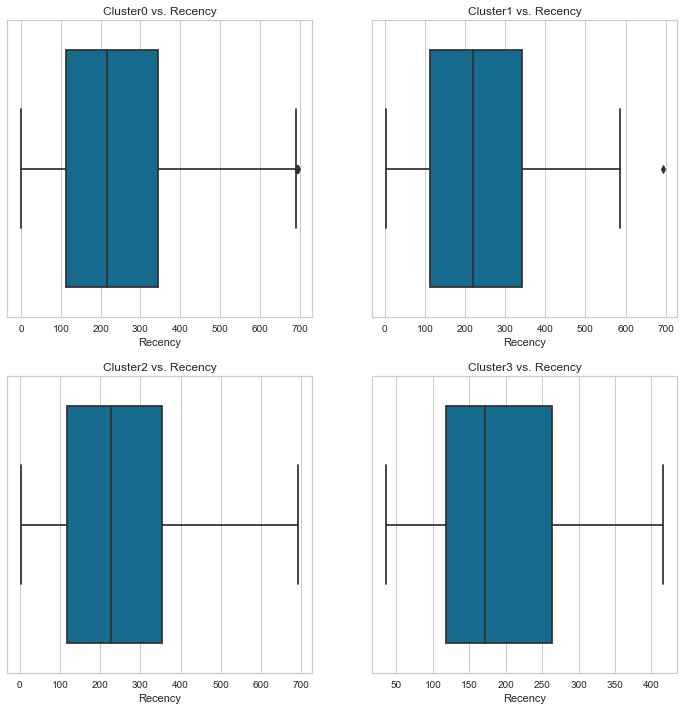

In [142]:
# Boxplot des clusters pour la feature Recency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Recency"], orient="vertical").set(title='Cluster0 vs. Recency')
plt.subplot(222)
sns.boxplot(cluster1["Recency"], orient="vertical").set(title='Cluster1 vs. Recency')
plt.subplot(223)
sns.boxplot(cluster2["Recency"], orient="vertical").set(title='Cluster2 vs. Recency')
plt.subplot(224)
sns.boxplot(cluster3["Recency"], orient="vertical").set(title='Cluster3 vs. Recency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Frequency')]

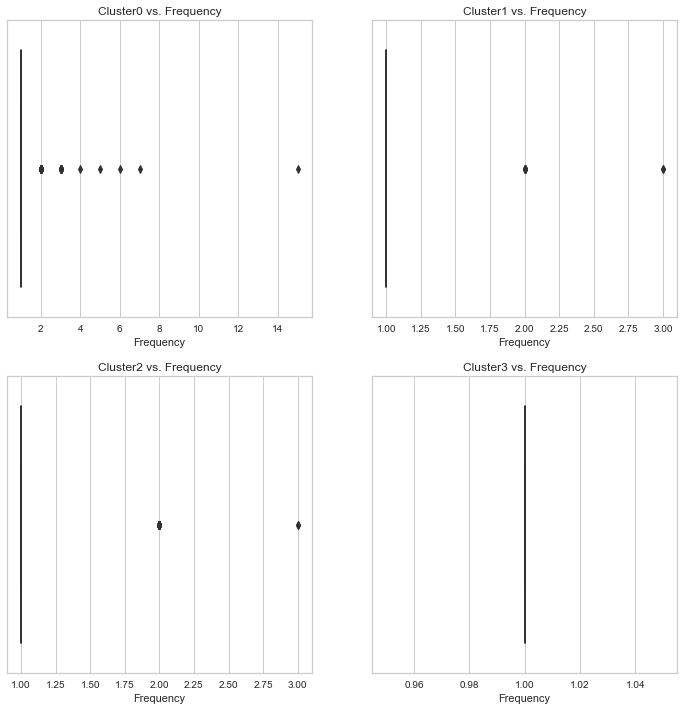

In [143]:
# Boxplot des clusters pour la feature Frequency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Frequency"], orient="vertical").set(title='Cluster0 vs. Frequency')
plt.subplot(222)
sns.boxplot(cluster1["Frequency"], orient="vertical").set(title='Cluster1 vs. Frequency')
plt.subplot(223)
sns.boxplot(cluster2["Frequency"], orient="vertical").set(title='Cluster2 vs. Frequency')
plt.subplot(224)
sns.boxplot(cluster3["Frequency"], orient="vertical").set(title='Cluster3 vs. Frequency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Monetary')]

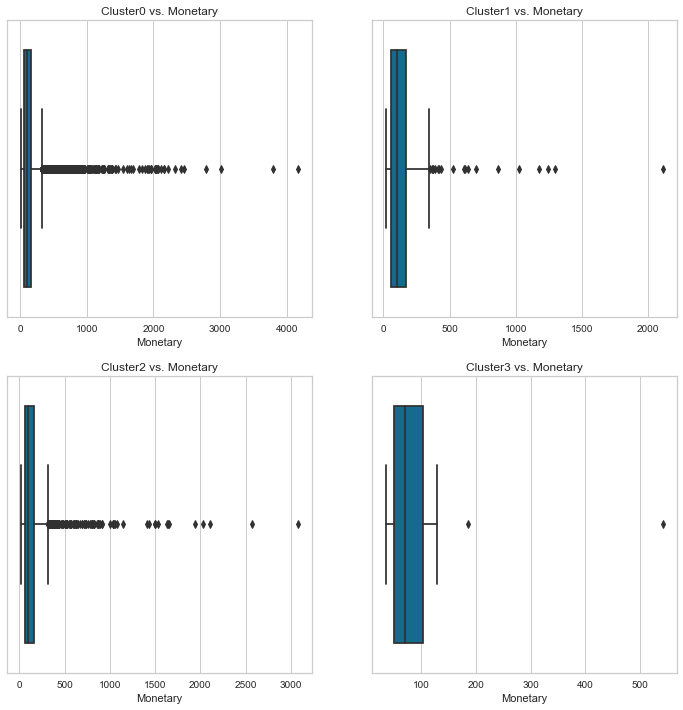

In [144]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["Monetary"], orient='vertical').set(title='Cluster0 vs. Monetary')
plt.subplot(222)
sns.boxplot(cluster1["Monetary"], orient='vertical').set(title='Cluster1 vs. Monetary')
plt.subplot(223)
sns.boxplot(cluster2["Monetary"], orient="vertical").set(title='Cluster2 vs. Monetary')
plt.subplot(224)
sns.boxplot(cluster3["Monetary"], orient="vertical").set(title='Cluster3 vs. Monetary')

In [145]:
X1.head()

Recency  Frequency  Monetary  mean_score  total_orders  \
47959 -0.125964  -0.159055 -0.540650   -0.804740      0.053064   
79161 -0.715806  -0.159055 -0.208432    0.695022     -0.283959   
5658  -0.689591  -0.159055 -0.581775    0.695022     -0.283959   
46646 -0.571622  -0.159055 -0.354208    0.695022      0.053064   
10676 -1.377739  -0.159055  0.301758    0.695022      0.053064   

       delivery_duration  
47959           0.379584  
79161          -0.698327  
5658           -0.806118  
46646          -0.159372  
10676           0.056210

In [146]:
# Display the clusters column in rfm_sclaed

X1_scaled = pd.DataFrame(X1, index=X1.index, columns=X1.columns)
X1_scaled["AggCl_label"] = AggCl.labels_
X1_scaled_clusters = X1_scaled.groupby("AggCl_label").mean()
X1_scaled_clusters

Recency  Frequency  Monetary  mean_score  total_orders  \
AggCl_label                                                            
0            0.004850  -0.158455  0.054522    0.351617     -0.054630   
1            0.012595   5.184948 -0.162246    0.038552     -0.137022   
2            0.005448  -0.153405 -0.152468   -1.683057      0.112212   
3            0.049201  -0.159055 -0.178764    0.695022     24.655795   

             delivery_duration  
AggCl_label                     
0                    -0.215328  
1                    -0.075078  
2                     0.977323  
3                    -0.717926

In [147]:


# Transformation inverse de StandardScaler
#X1_scaled=X1_scaled_clusters['Recency','Frequency','Monetary','mean_score','total_orders','delivery_duration']

#X1_clusters= ss.inverse_transform(X1_scaled_clusters) 


In [148]:
#X1_clusters=pd.DataFrame(X1_clusters)
X1_clusters=X1_scaled_clusters

In [150]:
plot_radars(data=X1_clusters,group="AggCl_label")

In [151]:

# Number of CLUSTERS = 10

# define the model
AggCl = AgglomerativeClustering(n_clusters =10, affinity = 'euclidean', linkage = 'ward')
# fit model and predict clusters
y_AggCl = AggCl.fit_predict(X1)

#clusters
y_AggCl



array([0, 1, 1, ..., 0, 5, 0])

In [152]:

# retrieve unique clusters
clusters_ac = unique(y_AggCl)
clusters_ac


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [153]:

unique(clusters_ac)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:

score_AGclustering = silhouette_score(X1, AggCl.labels_, metric='euclidean')
print('Silhouette Score: %.4f' % score_AGclustering)

Silhouette Score: 0.1898


In [155]:
X1.head()

Recency  Frequency  Monetary  mean_score  total_orders  \
47959 -0.125964  -0.159055 -0.540650   -0.804740      0.053064   
79161 -0.715806  -0.159055 -0.208432    0.695022     -0.283959   
5658  -0.689591  -0.159055 -0.581775    0.695022     -0.283959   
46646 -0.571622  -0.159055 -0.354208    0.695022      0.053064   
10676 -1.377739  -0.159055  0.301758    0.695022      0.053064   

       delivery_duration  AggCl_label  
47959           0.379584            0  
79161          -0.698327            0  
5658           -0.806118            0  
46646          -0.159372            0  
10676           0.056210            0

<b> DBSCAN Algorithmn:<b>

In [156]:
#Compute data proximity from each other using Nearest Neighbours
#--------------------------------------------
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

In [157]:
! pip install kneed

5.510362964451611


<Figure size 360x360 with 0 Axes>

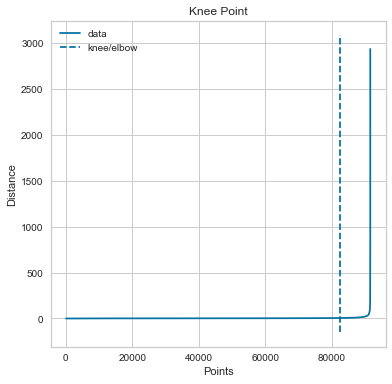

In [158]:

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [159]:


# Recherche des hyperparamètres optimaux de DBSCAN
 #   for l in L2_dbscan:                   # Définir les valeurs de  min_samples (boucle for)  
for k in [x * 0.5 for x in range(1, 3)]:# Définir les valeurs de eps (boucle for) 
    for l in range(20,40,10):                   # Définir les valeurs de  min_samples (boucle for) 
        dbscanCl = DBSCAN(eps=k, min_samples=l)
        y_dbscan = dbscanCl.fit(Xe)
        print('eps : %.1f' % k)
        print('min_samples: %.0f' % l)
        # Calculate Silhoutte Score
        score_dbsacn = silhouette_score(Xe, dbscanCl.labels_, metric='euclidean')
        print('Silhouette Score: %.3f' % score_dbsacn)  #   Print the silhouette score
        




eps : 0.5
min_samples: 20
Silhouette Score: 0.181
eps : 0.5
min_samples: 30
Silhouette Score: 0.201
eps : 1.0
min_samples: 20
Silhouette Score: 0.338
eps : 1.0
min_samples: 30
Silhouette Score: 0.337


In [160]:

# DBSCAN Model
#--------------------------------------------
from sklearn.cluster import DBSCAN

#------------------------------------------
# define the model

dbscanCl = DBSCAN(eps=1, min_samples=30)
# fit model and predict clusters
y_dbscanCl = dbscanCl.fit_predict(Xe)

#clusters
y_dbscanCl



array([0, 1, 1, ..., 2, 0, 2])

In [161]:
# retrieve unique clusters
clusters_dbscan = unique(y_dbscanCl)
clusters_dbscan 

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [162]:
db_labels=dbscanCl.labels_
clusters_nb = len(set(db_labels)) - (1 if -1 in db_labels else 0)
noise_nb = list(db_labels).count(-1)

In [163]:
print('Estimated number of clusters: %d' % clusters_nb)
print('Estimated number of noise points: %d' % noise_nb)

Estimated number of clusters: 7
Estimated number of noise points: 1534


In [164]:

# Calculate cluster validation metrics
score_dbsacn = silhouette_score(Xe, db_labels, metric='euclidean')
print('Silhouette Score: %.3f' % score_dbsacn)


Silhouette Score: 0.337


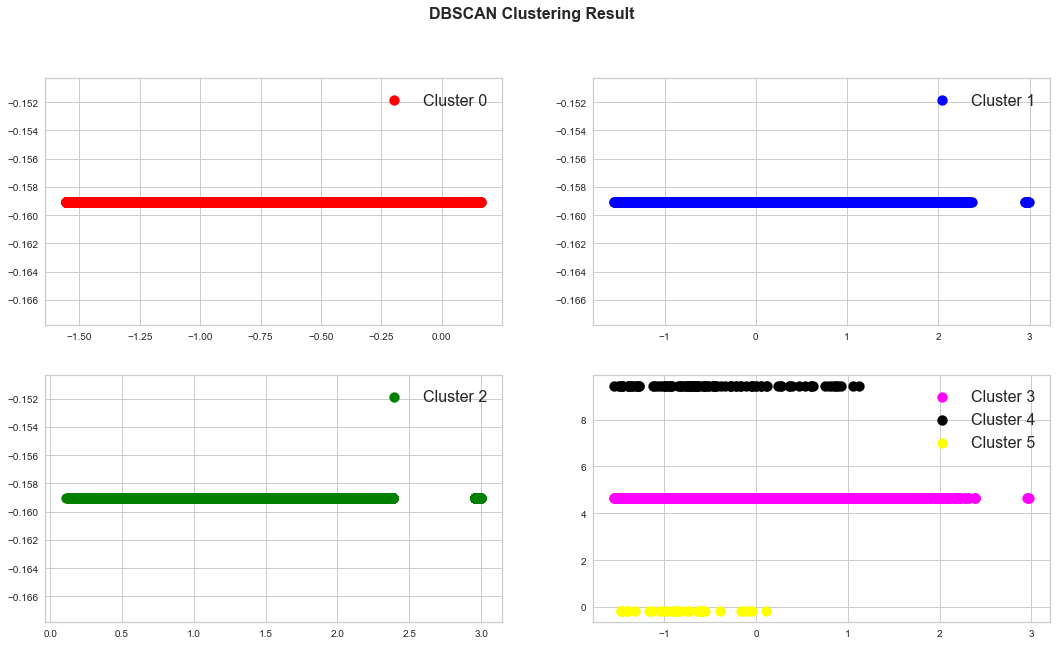

In [165]:

#Plot of clusters 
plt.figure(figsize=(18,10))
plt.suptitle('DBSCAN Clustering Result', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(Xe.iloc[y_dbscanCl == 0, 0], Xe.iloc[y_dbscanCl == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(Xe.iloc[y_dbscanCl == 1, 0], Xe.iloc[y_dbscanCl == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(Xe.iloc[y_dbscanCl == 2, 0], Xe.iloc[y_dbscanCl == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(Xe.iloc[y_dbscanCl == 3, 0], Xe.iloc[y_dbscanCl == 3, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.legend(fontsize=16)
plt.scatter(Xe.iloc[y_dbscanCl == 4, 0], Xe.iloc[y_dbscanCl == 4, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.legend(fontsize=16)
plt.scatter(Xe.iloc[y_dbscanCl == 5, 0], Xe.iloc[y_dbscanCl ==5, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.legend(fontsize=16)
plt.grid(True)
plt.show()


In [166]:

for i in range(len(clusters_dbscan)):
    print("Cluster", i)
    #print("Center:", dbscanCl.cluster_centers_[i])
    print("Size:", sum(dbscanCl.labels_ == i))


Cluster 0
Size: 42004
Cluster 1
Size: 14857
Cluster 2
Size: 30635
Cluster 3
Size: 2294
Cluster 4
Size: 100
Cluster 5
Size: 36
Cluster 6
Size: 61
Cluster 7
Size: 0


In [167]:

#clusters
cluster0 = Xe[y_dbscanCl == 0]
cluster1 = Xe[y_dbscanCl == 1]
cluster2 = Xe[y_dbscanCl == 2]
cluster3 = Xe[y_dbscanCl == 3]


In [168]:
cluster0.describe()

Recency     Frequency      Monetary    mean_score  total_orders  \
count  42004.000000  4.200400e+04  42004.000000  42004.000000  42004.000000   
mean      -0.717463 -1.590547e-01     -0.029105      0.403139     -0.088071   
std        0.477839  7.952067e-14      0.788823      0.470263      0.458373   
min       -1.554692 -1.590547e-01     -0.694538     -1.554621     -0.283959   
25%       -1.135249 -1.590547e-01     -0.449502     -0.054859     -0.283959   
50%       -0.715806 -1.590547e-01     -0.246572      0.695022     -0.283959   
75%       -0.316024 -1.590547e-01      0.088529      0.695022      0.053064   
max        0.162403 -1.590547e-01      8.640118      0.695022      4.434373   

       delivery_duration  kmeans_label  
count       42004.000000       42004.0  
mean           -0.194506           1.0  
std             0.653485           0.0  
min            -1.237283           1.0  
25%            -0.698327           1.0  
50%            -0.267163           1.0  
75%             0.164002           1.0  
max             3.505525           1.0

In [169]:
#clusters
cluster0 = num_features[y_dbscanCl == 0]
cluster1 = num_features[y_dbscanCl == 1]
cluster2 = num_features[y_dbscanCl == 2]
cluster3 = num_features[y_dbscanCl == 3]


In [170]:
cluster0.describe()

Recency  Frequency     Monetary    mean_score  total_orders  \
count  42004.000000    42004.0  42004.00000  42004.000000  42004.000000   
mean     127.747167        1.0    140.00547      4.610761      1.581230   
std       72.910294        0.0    154.59808      0.627117      1.360062   
min        0.000000        1.0      9.59000      2.000000      1.000000   
25%       64.000000        1.0     57.61375      4.000000      1.000000   
50%      128.000000        1.0     97.38500      5.000000      1.000000   
75%      189.000000        1.0    163.06000      5.000000      2.000000   
max      262.000000        1.0   1839.05000      5.000000     15.000000   

       delivery_duration  
count       42004.000000  
mean           10.674055  
std             6.062512  
min             1.000000  
25%             6.000000  
50%            10.000000  
75%            14.000000  
max            45.000000

In [171]:
cluster1.describe()

Recency  Frequency      Monetary    mean_score  total_orders  \
count  14857.000000    14857.0  14857.000000  14857.000000  14857.000000   
mean     231.207983        1.0    124.545994      1.568086      2.121222   
std      142.350877        0.0    103.567600      0.830962      1.959311   
min        0.000000        1.0     11.850000      1.000000      1.000000   
25%      119.000000        1.0     56.770000      1.000000      1.000000   
50%      218.000000        1.0     94.310000      1.000000      1.000000   
75%      324.000000        1.0    157.410000      2.000000      2.000000   
max      694.000000        1.0    836.700000      5.000000     15.000000   

       delivery_duration  
count       14857.000000  
mean           19.775863  
std            13.009435  
min             1.000000  
25%            10.000000  
50%            17.000000  
75%            27.000000  
max            84.000000

In [172]:
cluster2.describe()

Recency  Frequency      Monetary    mean_score  total_orders  \
count  30635.000000    30635.0  30635.000000  30635.000000  30635.000000   
mean     390.987629        1.0    138.589951      4.584977      1.591807   
std       95.922012        0.0    153.946082      0.663412      1.401188   
min      254.000000        1.0      9.341429      1.000000      1.000000   
25%      304.000000        1.0     57.510000      4.000000      1.000000   
50%      379.000000        1.0     94.050000      5.000000      1.000000   
75%      465.000000        1.0    159.560000      5.000000      2.000000   
max      695.000000        1.0   1657.110000      5.000000     15.000000   

       delivery_duration  
count       30635.000000  
mean           10.884054  
std             6.237399  
min             1.000000  
25%             6.000000  
50%            10.000000  
75%            14.000000  
max            52.000000

In [173]:
cluster3.describe()

Recency  Frequency     Monetary   mean_score  total_orders  \
count  2294.000000     2294.0  2294.000000  2294.000000   2294.000000   
mean    218.668265        2.0   112.693490     4.202623      1.524847   
std     141.063815        0.0    72.650076     1.225604      1.028186   
min       1.000000        2.0    14.976667     1.000000      1.000000   
25%     106.000000        2.0    63.675000     4.000000      1.000000   
50%     199.000000        2.0    93.760000     5.000000      1.000000   
75%     314.000000        2.0   142.542500     5.000000      2.000000   
max     691.000000        2.0   579.293333     5.000000      8.000000   

       delivery_duration  
count        2294.000000  
mean           11.061465  
std             6.396082  
min             1.000000  
25%             6.000000  
50%            10.000000  
75%            14.000000  
max            38.000000

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Recency')]

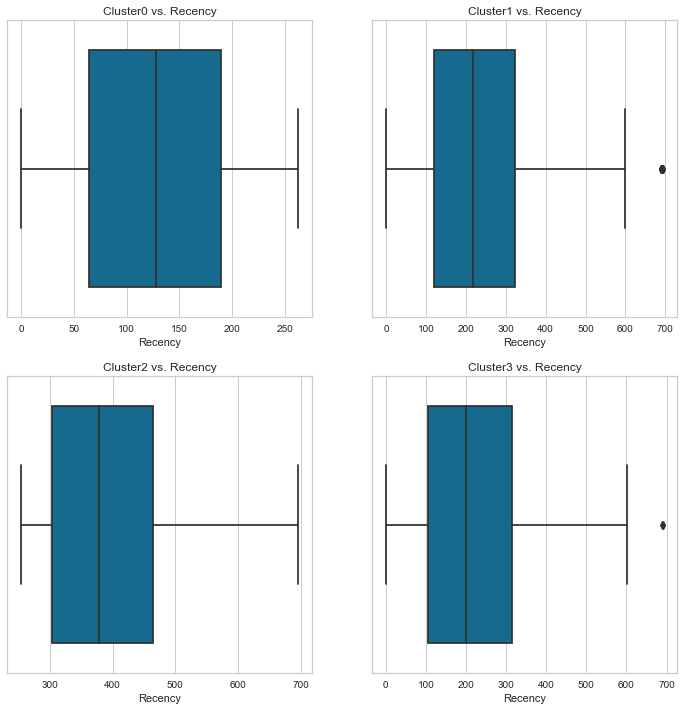

In [174]:
# Boxplot des clusters pour la feature Recency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Recency"], orient="vertical").set(title='Cluster0 vs. Recency')
plt.subplot(222)
sns.boxplot(cluster1["Recency"], orient="vertical").set(title='Cluster1 vs. Recency')
plt.subplot(223)
sns.boxplot(cluster2["Recency"], orient="vertical").set(title='Cluster2 vs. Recency')
plt.subplot(224)
sns.boxplot(cluster3["Recency"], orient="vertical").set(title='Cluster3 vs. Recency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Frequency')]

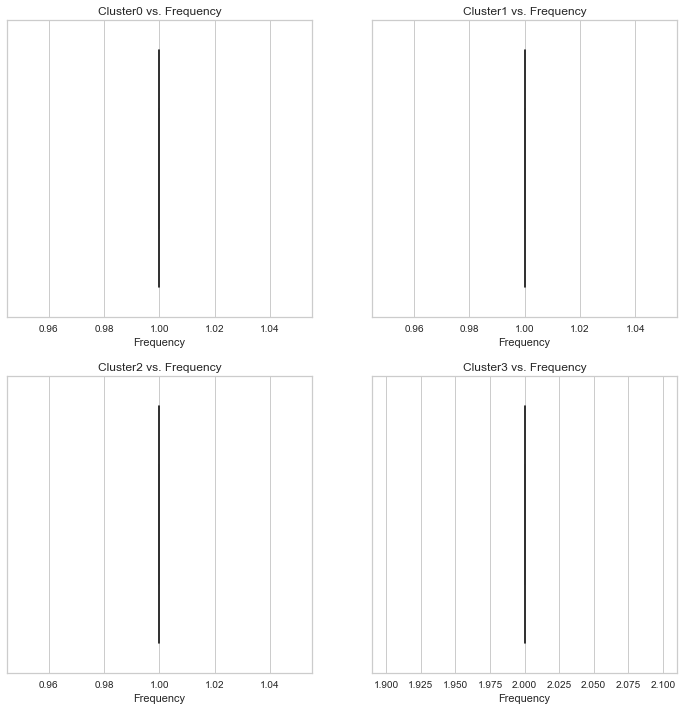

In [175]:
# Boxplot des clusters pour la feature Frequency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Frequency"], orient="vertical").set(title='Cluster0 vs. Frequency')
plt.subplot(222)
sns.boxplot(cluster1["Frequency"], orient="vertical").set(title='Cluster1 vs. Frequency')
plt.subplot(223)
sns.boxplot(cluster2["Frequency"], orient="vertical").set(title='Cluster2 vs. Frequency')
plt.subplot(224)
sns.boxplot(cluster3["Frequency"], orient="vertical").set(title='Cluster3 vs. Frequency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Monetary')]

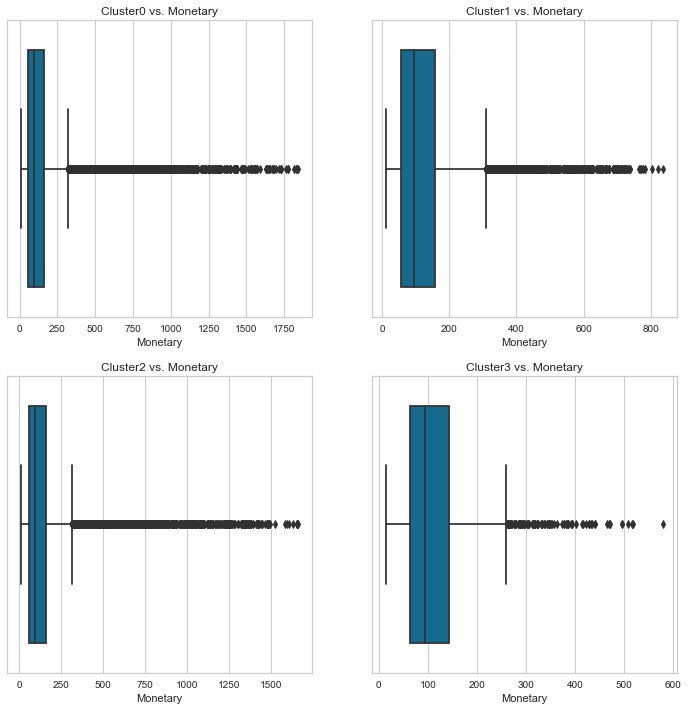

In [176]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["Monetary"], orient='vertical').set(title='Cluster0 vs. Monetary')
plt.subplot(222)
sns.boxplot(cluster1["Monetary"], orient='vertical').set(title='Cluster1 vs. Monetary')
plt.subplot(223)
sns.boxplot(cluster2["Monetary"], orient="vertical").set(title='Cluster2 vs. Monetary')
plt.subplot(224)
sns.boxplot(cluster3["Monetary"], orient="vertical").set(title='Cluster3 vs. Monetary')

In [177]:
# Display the clusters column 

X_scaled = pd.DataFrame(Xe, index=Xe.index, columns=Xe.columns)
X_scaled["dbscanCl_label"] = dbscanCl.labels_
X_scaled_clusters = X_scaled.groupby("dbscanCl_label").mean()
X_scaled_clusters


Recency  Frequency  Monetary  mean_score  total_orders  \
dbscanCl_label                                                            
-1              0.137333   1.532479  2.612757   -0.728964      2.383449   
 0             -0.717463  -0.159055 -0.029105    0.403139     -0.088071   
 1             -0.039402  -0.159055 -0.107986   -1.878505      0.093919   
 2              1.007761  -0.159055 -0.036328    0.383804     -0.084506   
 3             -0.121585   4.637271 -0.168462    0.097084     -0.107073   
 4             -0.457324   9.433597 -0.230936    0.497553     -0.155890   
 5             -0.786077  -0.159055  9.757446    0.583928     -0.171618   
 6             -0.144121  -0.159055 -0.162584    0.695022     24.655795   

                delivery_duration  kmeans_label  
dbscanCl_label                                   
-1                       1.431425        1.8103  
 0                      -0.194506        1.0000  
 1                       0.786588        2.0000  
 2                      -0.171870        0.0000  
 3                      -0.152746        3.0000  
 4                      -0.321058        3.0000  
 5                      -0.572571        1.0000  
 6                      -0.717765        2.0000

In [178]:

# Transformation inverse de StandardScaler
#X_clusters= ss.inverse_transform(X_scaled_clusters) 

In [179]:
#X_clusters=pd.DataFrame(X_clusters)
X_clusters = X_scaled_clusters

<b> KMedoids Algorithm<b>

In [180]:
!pip install scikit-learn-extra

In [181]:
from sklearn_extra.cluster import KMedoids

In [182]:

Xm= Xe[['Recency','Frequency','Monetary', 'mean_score','total_orders', 'delivery_duration']]
X2=Xm.sample(n=10000)

In [183]:
kmedoids = KMedoids(n_clusters=4,init='heuristic', random_state=0)
y_kmedoids = kmedoids.fit_predict(X2)
kmedoids.labels_

array([2, 0, 1, ..., 1, 2, 1])

In [184]:
# retrieve unique clusters
clusters_kmedoids = unique(y_kmedoids)
clusters_kmedoids 

array([0, 1, 2, 3])

In [185]:
# Calculate cluster validation metrics
score_kmedoids = silhouette_score(X2, kmedoids.labels_, metric='euclidean')
print('Silhouette Score: %.3f' %score_kmedoids)

Silhouette Score: 0.237


In [186]:
kmedoids.cluster_centers_

array([[-0.27014772, -0.15905474, -0.16118342, -1.55462114,  0.05306445,
        -0.37495391],
       [ 0.8898742 , -0.15905474, -0.22731066,  0.69502184, -0.28395926,
        -0.26716282],
       [-0.04076485, -0.15905474, -0.09587256, -0.80474015, -0.28395926,
         1.78086795],
       [-0.74857484, -0.15905474, -0.12260919,  0.69502184, -0.28395926,
        -0.26716282]])

In [187]:
kmedoids.inertia_

14236.10072126356

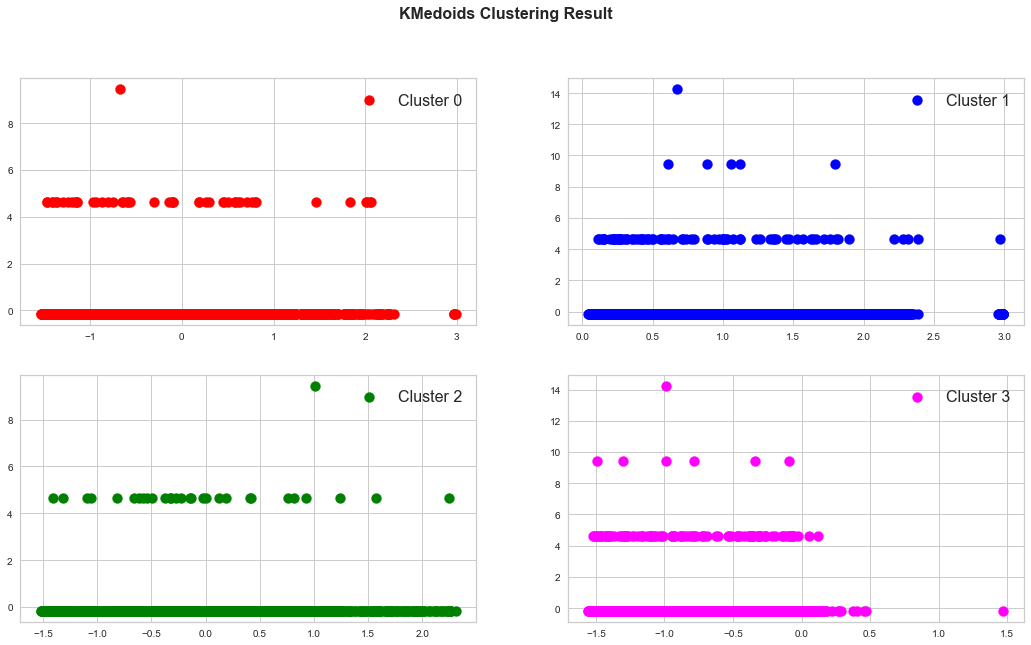

In [188]:
#Plot of clusters 
plt.figure(figsize=(18,10))
plt.suptitle('KMedoids Clustering Result', fontweight='bold', fontsize=16)
plt.subplot(221)
plt.scatter(X2.iloc[y_kmedoids == 0, 0], X2.iloc[y_kmedoids == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.legend(fontsize=16)
plt.subplot(222)
plt.scatter(X2.iloc[y_kmedoids == 1, 0], X2.iloc[y_kmedoids == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.legend(fontsize=16)
plt.subplot(223)
plt.scatter(X2.iloc[y_kmedoids == 2, 0], X2.iloc[y_kmedoids == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.legend(fontsize=16)
plt.subplot(224)
plt.scatter(X2.iloc[y_kmedoids == 3, 0], X2.iloc[y_kmedoids == 3, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [189]:
for i in range(len(kmedoids.cluster_centers_)):
    print("Cluster", i)
    print("Center:", kmedoids.cluster_centers_[i])
    print("Size:", sum(kmedoids.labels_ == i))

Cluster 0
Center: [-0.27014772 -0.15905474 -0.16118342 -1.55462114  0.05306445 -0.37495391]
Size: 1538
Cluster 1
Center: [ 0.8898742  -0.15905474 -0.22731066  0.69502184 -0.28395926 -0.26716282]
Size: 3258
Cluster 2
Center: [-0.04076485 -0.15905474 -0.09587256 -0.80474015 -0.28395926  1.78086795]
Size: 1093
Cluster 3
Center: [-0.74857484 -0.15905474 -0.12260919  0.69502184 -0.28395926 -0.26716282]
Size: 4111


In [190]:
#clusters
cluster0 = X2[y_kmedoids == 0]
cluster1 = X2[y_kmedoids == 1]
cluster2 = X2[y_kmedoids == 2]
cluster3 = X2[y_kmedoids == 3]

In [191]:
cluster0.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  1538.000000  1538.000000  1538.000000  1538.000000   1538.000000   
mean     -0.146900    -0.003127    -0.011755    -1.606109      0.376940   
std       0.930465     0.868315     0.874652     0.718369      1.983317   
min      -1.541584    -0.159055    -0.673670    -2.304502     -0.283959   
25%      -0.866543    -0.159055    -0.449929    -2.304502     -0.283959   
50%      -0.270148    -0.159055    -0.242210    -1.554621      0.053064   
75%       0.437662    -0.159055     0.096897    -0.804740      0.390088   
max       2.987089     9.433597    10.417644     0.695022     24.655795   

       delivery_duration  
count        1538.000000  
mean           -0.208642  
std             0.534566  
min            -1.237283  
25%            -0.590536  
50%            -0.267163  
75%             0.164002  
max             1.457495

In [192]:
#clusters
cluster0 = X11[y_kmedoids == 0]
cluster1 = X11[y_kmedoids == 1]
cluster2 = X11[y_kmedoids == 2]
cluster3 = X11[y_kmedoids == 3]

In [193]:
cluster0.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  1538.000000  1538.000000  1538.000000  1538.000000   1538.000000   
mean    239.977243     1.027958   145.460927     4.066719      1.884915   
std     155.294478     0.179998   183.370418     1.343556      3.435494   
min       0.000000     1.000000    16.190000     1.000000      1.000000   
25%     116.250000     1.000000    58.592500     4.000000      1.000000   
50%     224.000000     1.000000    98.205000     5.000000      1.000000   
75%     349.250000     1.000000   163.790000     5.000000      2.000000   
max     693.000000     3.000000  2416.000000     5.000000     75.000000   

       delivery_duration  
count        1538.000000  
mean           12.568270  
std             9.096509  
min             1.000000  
25%             7.000000  
50%            10.000000  
75%            16.000000  
max            73.000000

In [194]:
cluster1.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  3258.000000  3258.000000  3258.000000  3258.000000   3258.000000   
mean    242.976059     1.034070   148.870081     4.100097      1.866176   
std     155.528499     0.233263   206.969489     1.312083      3.396419   
min       2.000000     1.000000    13.290000     1.000000      1.000000   
25%     117.000000     1.000000    58.045000     4.000000      1.000000   
50%     224.000000     1.000000    98.080000     5.000000      1.000000   
75%     357.750000     1.000000   163.085000     5.000000      2.000000   
max     695.000000     7.000000  3792.590000     5.000000     75.000000   

       delivery_duration  
count        3258.000000  
mean           12.506139  
std             9.747194  
min             1.000000  
25%             7.000000  
50%            11.000000  
75%            16.000000  
max           208.000000

In [195]:
cluster2.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  1093.000000  1093.000000  1093.000000  1093.000000   1093.000000   
mean    232.966148     1.040256   146.395679     4.042755      1.918573   
std     152.135332     0.214469   208.141360     1.361577      2.765193   
min       1.000000     1.000000    17.970000     1.000000      1.000000   
25%     108.000000     1.000000    58.340000     4.000000      1.000000   
50%     211.000000     1.000000    96.800000     5.000000      1.000000   
75%     343.000000     1.000000   156.990000     5.000000      2.000000   
max     691.000000     3.000000  3009.530000     5.000000     35.000000   

       delivery_duration  
count        1093.000000  
mean           13.205855  
std            10.975943  
min             1.000000  
25%             7.000000  
50%            11.000000  
75%            16.000000  
max           183.000000

In [196]:
cluster3.describe()

Recency    Frequency     Monetary   mean_score  total_orders  \
count  4111.000000  4111.000000  4111.000000  4111.000000   4111.000000   
mean    232.969594     1.034541   148.774013     4.091589      1.884700   
std     151.140758     0.288926   204.525939     1.324597      3.406925   
min       2.000000     1.000000    13.820000     1.000000      1.000000   
25%     112.000000     1.000000    56.740000     4.000000      1.000000   
50%     216.000000     1.000000    97.065000     5.000000      1.000000   
75%     338.500000     1.000000   163.315000     5.000000      2.000000   
max     692.000000    15.000000  4163.510000     5.000000     75.000000   

       delivery_duration  
count        4111.000000  
mean           12.411092  
std             9.145475  
min             1.000000  
25%             7.000000  
50%            10.000000  
75%            15.000000  
max           195.000000

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Recency')]

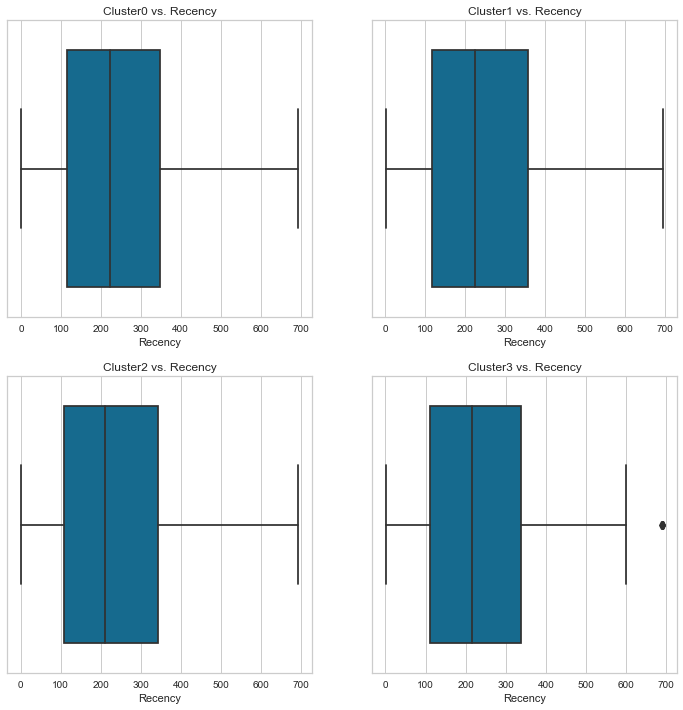

In [197]:
# Boxplot des clusters pour la feature Recency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Recency"], orient="vertical").set(title='Cluster0 vs. Recency')
plt.subplot(222)
sns.boxplot(cluster1["Recency"], orient="vertical").set(title='Cluster1 vs. Recency')
plt.subplot(223)
sns.boxplot(cluster2["Recency"], orient="vertical").set(title='Cluster2 vs. Recency')
plt.subplot(224)
sns.boxplot(cluster3["Recency"], orient="vertical").set(title='Cluster3 vs. Recency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Frequency')]

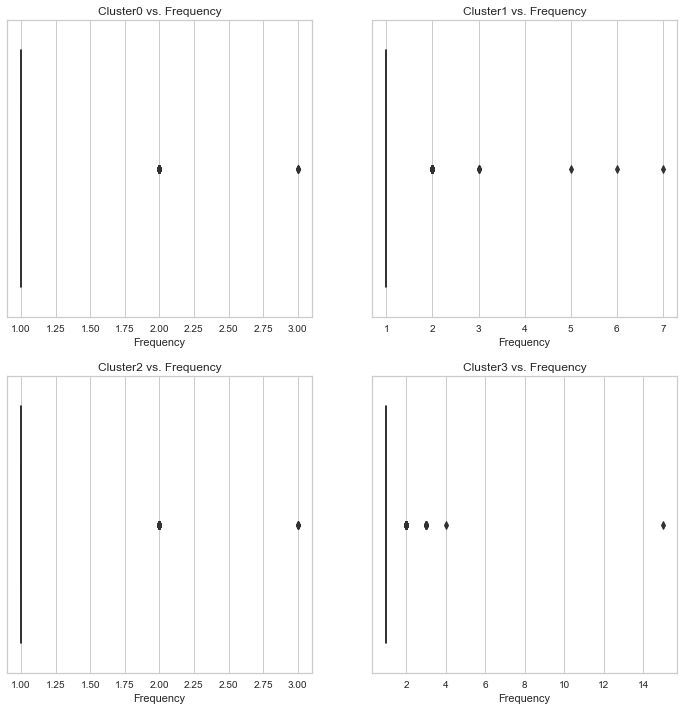

In [198]:
# Boxplot des clusters pour la feature Frequency
plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.boxplot(cluster0["Frequency"], orient="vertical").set(title='Cluster0 vs. Frequency')
plt.subplot(222)
sns.boxplot(cluster1["Frequency"], orient="vertical").set(title='Cluster1 vs. Frequency')
plt.subplot(223)
sns.boxplot(cluster2["Frequency"], orient="vertical").set(title='Cluster2 vs. Frequency')
plt.subplot(224)
sns.boxplot(cluster3["Frequency"], orient="vertical").set(title='Cluster3 vs. Frequency')

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_de

[Text(0.5, 1.0, 'Cluster3 vs. Monetary')]

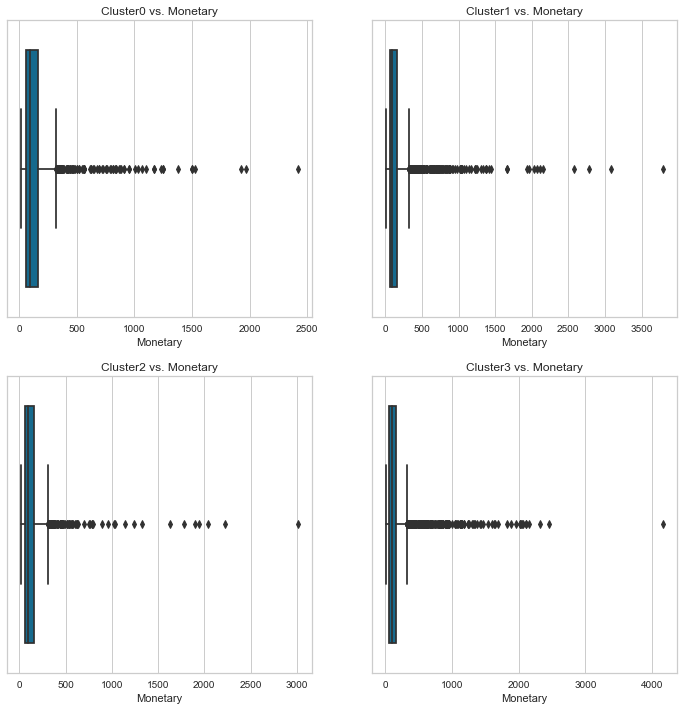

In [199]:
#Boxplots des clusters pour la feature Monetary
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(cluster0["Monetary"], orient='vertical').set(title='Cluster0 vs. Monetary')
plt.subplot(222)
sns.boxplot(cluster1["Monetary"], orient='vertical').set(title='Cluster1 vs. Monetary')
plt.subplot(223)
sns.boxplot(cluster2["Monetary"], orient="vertical").set(title='Cluster2 vs. Monetary')
plt.subplot(224)
sns.boxplot(cluster3["Monetary"], orient="vertical").set(title='Cluster3 vs. Monetary')

In [200]:
# Display the clusters column in rfm_sclaed

X2_scaled = pd.DataFrame(X2, index=X2.index, columns=X2.columns)
X2_scaled["kmedoids_label"] = kmedoids.labels_
X2_scaled_clusters = X2_scaled.groupby("kmedoids_label").mean()
X2_scaled_clusters

Recency  Frequency  Monetary  mean_score  total_orders  \
kmedoids_label                                                            
0              -0.146900  -0.003127 -0.011755   -1.606109      0.376940   
1               1.001637  -0.019199 -0.061192    0.457621     -0.085655   
2               0.022291  -0.023020  0.042984   -1.015858     -0.085075   
3              -0.744948  -0.017883  0.025029    0.515007     -0.070235   

                delivery_duration  
kmedoids_label                     
0                       -0.208642  
1                       -0.234706  
2                        2.041322  
3                       -0.253633

In [202]:
#X2_clusters=pd.DataFrame(X2_clusters)
X2_clusters = X2_scaled_clusters

In [203]:
plot_radars(data=X2_clusters,group="kmedoids_label")